## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import re as re
from geopy.geocoders import Nominatim

## Import dataset / first look at data

In [2]:
## import data
immoscout = pd.read_csv(
    './data/immo_data_202208_v2.csv',
    index_col=[0]
    )

c:\Users\rami0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
## replace whitespaces in column names
immoscout.columns = immoscout.columns.str.replace(" ", "_")

In [4]:
immoscout.head(4)

Unnamed:_0.1 Municipality Living_space Plot_area Floor_space Availability  \
0             0   Biberstein       100 m²       NaN         NaN   On request   
1             1   Biberstein       156 m²    222 m²      242 m²   On request   
2             2          NaN          NaN       NaN         NaN          NaN   
3             3   Biberstein       154 m²    370 m²      257 m²   On request   

                                location  \
0                    5023 Biberstein, AG   
1   Buhldenstrasse 8d5023 Biberstein, AG   
2                       5022 Rombach, AG   
3  Buhaldenstrasse 8A5023 Biberstein, AG   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   
2  2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...   
3  4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...   

                                detailed_description  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...   
1  DescriptionStilvolle Liegenschaft an ruhiger L...   
2  detail_responsive#description_title2,5 Zimmerw...   
3  DescriptionDieses äusserst grosszügige Minergi...   

                                                 url  ... features  \
0  https://www.immoscout24.ch//en/d/penthouse-buy...  ...      NaN   
1  https://www.immoscout24.ch//en/d/terrace-house...  ...      NaN   
2  https://www.immoscout24.ch//en/d/penthouse-buy...  ...      NaN   
3  https://www.immoscout24.ch//en/d/detached-hous...  ...      NaN   

  description_detailed Floor_space: Number_of_floors: Volume:     plz  \
0                  NaN          NaN               NaN     NaN  5023.0   
1                  NaN          NaN               NaN     NaN  5023.0   
2                  NaN          NaN               NaN     NaN  5022.0   
3                  NaN          NaN               NaN     NaN  5023.0   

  Number_of_toilets: Gross_yield: Minimum_floor_space: space_cleaned  
0                NaN          NaN                  NaN           NaN  
1                NaN          NaN                  NaN           NaN  
2                NaN          NaN                  NaN           NaN  
3                NaN          NaN                  NaN           NaN  

[4 rows x 133 columns]

In [5]:
immoscout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22481 entries, 0 to 22480
Columns: 133 entries, Unnamed:_0.1 to space_cleaned
dtypes: float64(63), int64(3), object(67)
memory usage: 23.0+ MB


In [6]:
immoscout.describe()

Unnamed:_0.1           lat           lon         index  ForestDensityL  \
count  22481.000000  22464.000000  22464.000000  22481.000000    22481.000000   
mean   12513.822250     46.635880      7.574546  29347.422045        0.188333   
std     8216.479963      0.494437      0.912712  25374.526109        0.200194   
min        0.000000     45.825344      5.970274      2.000000        0.000000   
25%     5643.000000     46.226208      6.929264  12716.000000        0.023758   
50%    11263.000000     46.497972      7.357070  12716.000000        0.114693   
75%    18770.000000     47.054821      8.287937  45795.000000        0.296525   
max    29303.000000     47.792463     10.399094  84754.000000        0.896966   

       ForestDensityM  ForestDensityS      Latitude     Longitude  \
count    22481.000000    22481.000000  22481.000000  22481.000000   
mean         0.124134        0.079028     46.636486      7.575568   
std          0.179710        0.163772      0.494628      0.912848   
min          0.000000        0.000000     45.826553      5.971354   
25%          0.000000        0.000000     46.224047      6.929208   
50%          0.030199        0.000000     46.496443      7.357162   
75%          0.190419        0.050985     47.056408      8.292168   
max          0.999453        1.000000     47.791953     10.396715   

       NoisePollutionRailwayL  ...  Plot_area_unified  Living_area_unified  \
count            22481.000000  ...        7953.000000         20979.000000   
mean                 0.013129  ...        1381.212121           160.777253   
std                  0.025646  ...        6704.901382           136.126762   
min                  0.000000  ...           1.000000             1.000000   
25%                  0.000000  ...         347.000000            96.000000   
50%                  0.000000  ...         645.000000           130.000000   
75%                  0.015243  ...        1141.000000           181.000000   
max                  0.258665  ...      350917.000000          4362.000000   

       No._of_rooms:  Number_of_apartments:  Last_refurbishment:  Year_built:  \
count    8868.000000             904.000000          2257.000000  6933.000000   
mean        5.039693               5.495575          2013.533895  1987.161114   
std         2.508945              17.790337             9.310723    58.214760   
min         1.000000               1.000000          1930.000000  1400.000000   
25%         3.500000               1.000000          2010.000000  1975.000000   
50%         4.500000               2.000000          2016.000000  2009.000000   
75%         5.500000               6.000000          2020.000000  2022.000000   
max        35.000000             502.000000          2025.000000  2025.000000   

       Number_of_floors:           plz  Number_of_toilets:  space_cleaned  
count        2399.000000  22464.000000                73.0    9126.000000  
mean            2.702793   3686.224849                 1.0     164.077800  
std             1.441823   2465.518124                 0.0     159.628126  
min             1.000000    397.000000                 1.0       1.000000  
25%             2.000000   1800.000000                 1.0      93.000000  
50%             3.000000   2542.000000                 1.0     127.500000  
75%             3.000000   5736.000000                 1.0     184.000000  
max            18.000000   9658.000000                 1.0    4362.000000  

[8 rows x 66 columns]

## Reduce dataframe

Der Dataframe hat momentan zu viele Columns, um sich einen guten überblick verschaffen zu können, wir werden deshalb vorerst einen reduzierten Dataframe mit den aus unserer Sicht wichtigsten Merkmalen genauer untersuchen. 



Als ersten Schritt haben wir die columns mit >30% missing values gedropt, da diese nicht viele Informationen enthalten.


In [7]:
# Calculate the percentage of missing values in each column
missing = immoscout.isnull().mean()
missing

Unnamed:_0.1            0.000000
Municipality            0.041413
Living_space            0.483430
Plot_area               0.791646
Floor_space             0.876562
                          ...   
plz                     0.000756
Number_of_toilets:      0.996753
Gross_yield:            0.999377
Minimum_floor_space:    0.999911
space_cleaned           0.594057
Length: 133, dtype: float64

In [8]:
# Drop columns with more than 50% missing values
immoscout_reduced = immoscout.drop(columns=missing[missing > 0.3].index)
immoscout_reduced.columns

Index(['Unnamed:_0.1', 'Municipality', 'location', 'description',
       'detailed_description', 'url', 'location_parsed', 'price', 'lat', 'lon',
       'index', 'ForestDensityL', 'ForestDensityM', 'ForestDensityS',
       'Latitude', 'Locality', 'Longitude', 'NoisePollutionRailwayL',
       'NoisePollutionRailwayM', 'NoisePollutionRailwayS',
       'NoisePollutionRoadL', 'NoisePollutionRoadM', 'NoisePollutionRoadS',
       'PopulationDensityL', 'PopulationDensityM', 'PopulationDensityS',
       'RiversAndLakesL', 'RiversAndLakesM', 'RiversAndLakesS',
       'WorkplaceDensityL', 'WorkplaceDensityM', 'WorkplaceDensityS', 'Zip',
       'distanceToTrainStation', 'gde_area_agriculture_percentage',
       'gde_area_forest_percentage', 'gde_area_nonproductive_percentage',
       'gde_area_settlement_percentage', 'gde_average_house_hold',
       'gde_empty_apartments', 'gde_foreigners_percentage',
       'gde_new_homes_per_1000', 'gde_politics_cvp', 'gde_politics_evp',
       'gde_politics_fd

Als nächstes haben wir die folgenden Columns als die die aus unserer Sicht wichtigsten definiert:
- price 
- price_cleaned
- type
- type_unified
- Space_extracted
- Living_area_unified
- rooms
- Municipality
- location
- lat
- lon
- description
- detailed_description
- location_parsed

Die  lat und lon, sind für uns primär wichtig, damit wir die Adressen aus einem Geo Coder auslesen können und diese anschliessend mit den im Dataset vorhandenen angaben querchecken können.

Die price und price_cleaned sollten auch redundant sein, aber wir würden dies gerne noch prüfen

Genauso erhoffen wir uns aus der Description informationen herausfiltern zu können und diese mit dem Dataset querchecken zu können

In [9]:
## drop 'unimportant columns'
col_names = ['price', 'price_cleaned', 'provider', 'description', 'detailed_description','type', 'type_unified', 'Space_extracted', 'Living_area_unified', 'rooms', 'Municipality', 'location', 'location_parsed', 'lat', 'lon']
immoscout_reduced = immoscout_reduced[col_names]
immoscout_reduced.head(2)

price  price_cleaned        provider  \
0  CHF 1,150,000.—      1150000.0  Immoscout24.ch   
1  CHF 1,420,000.—      1420000.0  Immoscout24.ch   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   

                                detailed_description           type  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...      penthouse   
1  DescriptionStilvolle Liegenschaft an ruhiger L...  terrace-house   

    type_unified  Space_extracted  Living_area_unified rooms Municipality  \
0      penthouse            100.0                100.0   5.0   Biberstein   
1  terrace-house            156.0                156.0   5.0   Biberstein   

                               location  \
0                   5023 Biberstein, AG   
1  Buhldenstrasse 8d5023 Biberstein, AG   

                                     location_parsed      lat     lon  
0    Strasse:  plz:5023 Stadt: Biberstein Kanton: AG  47.4171  8.0856  
1  Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...  47.4195  8.0827

Nun haben wir noch alle rows gedropt, bei welchen unsere zielvariable nan ist

In [10]:
immoscout_reduced = immoscout_reduced.dropna(subset=["price_cleaned"])

In [11]:
immoscout_reduced.shape

(21466, 15)

In [12]:
############################# clean price column ###########################

# clean up CHF values
for char in ["CHF", ".", ",", "—", "–", " "]:
    immoscout_reduced.price = immoscout_reduced.price.str.replace(char, "")
immoscout_reduced.price = immoscout_reduced.price.replace("Priceonrequest", np.nan)

# convert EUR to CHF with exchange course EUR --> CHF 0.99 (Date: 16.12.2022)
def EUR_to_CHF(s):
    exchange_course = 0.99 # EUR to CHF
    if s.startswith("EUR"):
        return float(s[3:]) * exchange_course
    else:
        return s

immoscout_reduced.price = immoscout_reduced.price.astype(str)
immoscout_reduced.price = immoscout_reduced.price.apply(EUR_to_CHF)

# convert rest of values to float
immoscout_reduced.price = immoscout_reduced.price.astype(float)

<ipython-input-12-e18ce8ea6bb6>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  immoscout_reduced.price = immoscout_reduced.price.str.replace(char, "")


In [13]:
################ cross check price and price_cleaned #######################
immoscout_reduced[immoscout_reduced.price != immoscout_reduced.price_cleaned]

price  price_cleaned        provider  \
860     628650.0       635000.0  Immoscout24.ch   
2107    772200.0       780000.0  Immoscout24.ch   
7682    490050.0       495000.0  Immoscout24.ch   
7774    490050.0       495000.0  Immoscout24.ch   
8531    188100.0       190000.0  Immoscout24.ch   
8795    643500.0       650000.0  Immoscout24.ch   
12311  1622610.0      1639000.0  Immoscout24.ch   
14087  1118700.0      1130000.0     homegate.ch   
14088  1188000.0      1200000.0     homegate.ch   
14089  1326600.0      1340000.0     homegate.ch   
14090  1628550.0      1645000.0     homegate.ch   
14091  1861200.0      1880000.0     homegate.ch   
14093  2108700.0      2130000.0     homegate.ch   
14095  5445000.0      5500000.0     homegate.ch   
20705  9900000.0     10000000.0     homegate.ch   
21096   198000.0       200000.0     homegate.ch   
21279  1168200.0      1180000.0     homegate.ch   

                                             description  \
860    3.5 rooms, 100 m²«Wohnen über den Dächern von ...   
2107   7.5 rooms, 350 m²«Rustico in Sardinien in Arza...   
7682   4.5 rooms, 113 m²«CAMPIONE D ITALIA Urlaub ver...   
7774   3.5 rooms, 110 m²«Das ganze Jahr in den Ferien...   
8531   4.5 rooms, 101 m²«Vivere o trascorrere le vaca...   
8795   10 rooms, 356 m²«Herrenhaus am Waldrand»EUR 65...   
12311  5 rooms, 140 m²«Batisse ideal investisseur fac...   
14087  BDN205: Situé dans le quartier historique de L...   
14088  BDN206: Situé dans le quartier historique de L...   
14089  N304: Cette résidence luxueuse située au c?ur ...   
14090  N305: Cette résidence luxueuse située au c?ur ...   
14091  N307: Cette résidence luxueuse située au c?ur ...   
14093  "Chalet Nagano" - Splendide appartement 4 cham...   
14095  L?un des plus beaux emplacement que Les Gets p...   
20705                                                NaN   
21096  www.mybauernhaus.ch -- Nähere InformationenDas...   
21279  Aufwachen mit einem wunderschönen Blick aufs M...   

                                    detailed_description            type  \
860    DescriptionAchtung, diese Wohnung ist auf der ...       penthouse   
2107   DescriptionEin Juwel auf Sardinien - Arzachena...           villa   
7682   Description4,5-Zimmer Wohnung mit einem wunder...            flat   
7774   DescriptionCampione d Italia, Italien - Diese ...            flat   
8531   Description***Tutti gli immobili, foto e virtu...            flat   
8795   DescriptionDieses charmante Herrenhaus stammt ...  detached-house   
12311  DescriptionRef 2437LC:C est un bien idéal pour...  detached-house   
14087  Description\n""Chalet Boule de Neige" - Incroy...       Apartment   
14088  Description\n""Chalet Boule de Neige" - Magnif...       Apartment   
14089  Description\n""Chalet Nagano" - Magnifique app...       Apartment   
14090  Description\n""Chalet Nagano" - Superbe appart...       Apartment   
14091  Description\n""Chalet Nagano" - Magnifique app...       Apartment   
14093  Description\n""Chalet Nagano" - Splendide appa...       Apartment   
14095  Description\n"Chalet Bohème - Les Gets"\nL?un ...          Chalet   
20705       Description\n"Maison individuelle à Ittigen"    Single house   
21096  Description\n"Farmhouse Chalet - Projekt Bauer...      Farm house   
21279  Description\n"2.5 Zi.-Whg - das Matterhorn dir...       Apartment   

         type_unified  Space_extracted  Living_area_unified  rooms  \
860         penthouse            100.0                100.0    5.0   
2107            villa            350.0                350.0    5.0   
7682             flat            113.0                113.0    5.0   
7774             flat            110.0                110.0    5.0   
8531             flat            101.0                101.0    5.0   
8795   detached-house            356.0                356.0    0.0   
12311  detached-house            140.0                140.0    5.0   
14087            flat             97.0                 97.0    4rm   
14088       

In [14]:
condition1 = immoscout_reduced.price != immoscout_reduced.price_cleaned
condition2 = immoscout_reduced.price != immoscout_reduced.price_cleaned * 0.99
immoscout_reduced[condition1 & condition2]

Empty DataFrame
Columns: [price, price_cleaned, provider, description, detailed_description, type, type_unified, Space_extracted, Living_area_unified, rooms, Municipality, location, location_parsed, lat, lon]
Index: []

In [15]:
immoscout_reduced = immoscout_reduced.drop(columns= ['price_cleaned'])
immoscout_reduced.head(2)

price        provider  \
0  1150000.0  Immoscout24.ch   
1  1420000.0  Immoscout24.ch   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   

                                detailed_description           type  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...      penthouse   
1  DescriptionStilvolle Liegenschaft an ruhiger L...  terrace-house   

    type_unified  Space_extracted  Living_area_unified rooms Municipality  \
0      penthouse            100.0                100.0   5.0   Biberstein   
1  terrace-house            156.0                156.0   5.0   Biberstein   

                               location  \
0                   5023 Biberstein, AG   
1  Buhldenstrasse 8d5023 Biberstein, AG   

                                     location_parsed      lat     lon  
0    Strasse:  plz:5023 Stadt: Biberstein Kanton: AG  47.4171  8.0856  
1  Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...  47.4195  8.0827

Bei der price cleaned variable wurde der exchange kurs von eur to chf nicht berücksichtigt, dies scheint aber auch der einzige unterschied zu sein. somit ist die von uns 'gecleante' variable besser und wir droppen die price_cleaned

In [16]:
#################### cross check type and type unified ######################
immoscout_reduced[immoscout_reduced.type != immoscout_reduced.type_unified]

price     provider  \
13355  3500000.0  homegate.ch   
13356   995000.0  homegate.ch   
13357   935000.0  homegate.ch   
13358   640000.0  homegate.ch   
13359   730000.0  homegate.ch   
...          ...          ...   
22476   475000.0  homegate.ch   
22477  1490000.0  homegate.ch   
22478  1450000.0  homegate.ch   
22479  1290000.0  homegate.ch   
22480   780000.0  homegate.ch   

                                             description  \
13355  Cette maison, construite en 1914, est située d...   
13356  PROXIMMO, VOTRE AGENCE IMMOBILIÈRE À LAUSANNE ...   
13357  Situé au coeur de Lausanne, dans un quartier p...   
13358  Charmant appartement de 2,5 pièces avec un jol...   
13359  Joli appartement de 3.5 pièces, d'une surface ...   
...                                                  ...   
22476                                                NaN   
22477                                                NaN   
22478                                                NaN   
22479                                                NaN   
22480                                                NaN   

                                    detailed_description                type  \
13355  Description\n"Maison de maître composée de 3 a...  Multi-family house   
13356  Description\n"A SAISIR ! EMPLACEMENT IDÉAL EN ...           Apartment   
13357  Description\n"VISITE VIRTUELLE : Exclusif au c...           Apartment   
13358  Description\n"Charmant appartement - joli pote...           Apartment   
13359  Description\n"3.5 pièces au 2ème étage"\nJoli ...           Apartment   
...                                                  ...                 ...   
22476  Description\n"Hausteil mit verschieden Nutzung...    Bifamiliar house   
22477  Description\n"J'ADORE - Exklusives Wohnen in W...        Terrace flat   
22478  Description\n"Einmalige Gelegenheit an sehr gu...        Single house   
22479  Description\n"LA VIE - Exklusives Wohnen in Ma...        Terrace flat   
22480  Description\n"Historisches Altstadthaus im "St...        Single house   

            type_unified  Space_extracted  Living_area_unified   rooms  \
13355     detached-house            275.0                275.0  10.5rm   
13356               flat            106.0                106.0   4.5rm   
13357               flat            100.0                100.0   3.5rm   
13358               flat             52.0                 52.0   2.5rm   
13359               flat             61.0                 61.0     3rm   
...                  ...              ...                  ...     ...   
22476     detached-house            102.0                102.0   4.5rm   
22477  stepped-apartment            250.0                250.0   5.5rm   
22478     detached-house            240.0                240.0   5.5rm   
22479  stepped-apartment            175.0                175.0   5.5rm   
22480     detached-house            220.0                220.0     7rm   

         Municipality                              location  \
13355        Lausanne                      1000 Lausanne 26   
13356        Lausanne                         1004 Lausanne   
13357        Lausanne                         1004 Lausanne   
13358        Lausanne                         1018 Lausanne   
13359        Lausanne                         1018 Lausanne   
...               ...                                   ...   
22476        Buchs SG  Altendorferstrasse 53, 9470 Buchs SG   
22477             Wil       Fürstenlandstrasse 69, 9500 Wil   
22478          Wil SG                           9500 Wil SG   
22479       Matzingen      Haldenstrasse 30, 9548 Matzingen   
22480    Lichtensteig         Neugasse 1, 9620 Lichtensteig   

                                         location_parsed        lat       lon  
13355               Strasse:   plz:1000 Stadt:  Lausanne  46.521827  6.632702  
13356               Strasse:   plz:1004 Stadt:  Lausanne  46.521827  6.632702  
13357               Strasse:   plz:1004 Stadt:

In [17]:
immoscout_reduced['type_cleaned'] = immoscout_reduced.type
housing_types1 = ['Apartment',  'Bifamiliar house', 'Terrace flat',     'Single house',     "Multi-family house",   'Duplex',           'Row house',            'Attic flat',   'Furnished dwelling',               'Villa',    'Loft', 'Studio', 'Roof flat', 'Farm house', 'Castle', 'Terrace house', 'Rustic house', 'Chalet', 'Attic', 'Hobby room', 'Granny flat', 'Cellar compartment']
housing_types2 = ['flat',       'detached-house',   'stepped-apartment','detached-house',   'detached-house',       'duplex-maisonette', 'semi-detached-house',  'attic-flat',  'furnished-residential-property',   'villa',    'loft', 'studio', 'penthouse', 'farmhouse', 'castle', 'terrace-house', 'rustico', 'chalet', 'attic-room', 'single-room', 'flat', 'single-room']
for index in range(len(housing_types1)):
    immoscout_reduced.type_cleaned = immoscout_reduced.type_cleaned.str.replace(housing_types1[index], housing_types2[index])
immoscout_reduced[immoscout_reduced.type_cleaned != immoscout_reduced.type_unified]

Empty DataFrame
Columns: [price, provider, description, detailed_description, type, type_unified, Space_extracted, Living_area_unified, rooms, Municipality, location, location_parsed, lat, lon, type_cleaned]
Index: []

In [18]:
housing_types1 = ['Bifamiliar house', 'Single house',"Multi-family house",'Row house', 'Hobby room', 'Granny flat', 'Cellar compartment']
for e in housing_types1:
    print(e,": ",len(immoscout_reduced.type[immoscout_reduced.type == e]))

Bifamiliar house :  272
Single house :  1515
Multi-family house :  167
Row house :  277
Hobby room :  1
Granny flat :  1
Cellar compartment :  1


In [19]:
immoscout_reduced = immoscout_reduced.drop(columns= ['type_unified', 'type_cleaned'])
immoscout_reduced = immoscout_reduced[immoscout_reduced.type.isin(['Hobby room', 'Granny flat', 'Cellar compartment']) == False]
immoscout_reduced.head(2)

price        provider  \
0  1150000.0  Immoscout24.ch   
1  1420000.0  Immoscout24.ch   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   

                                detailed_description           type  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...      penthouse   
1  DescriptionStilvolle Liegenschaft an ruhiger L...  terrace-house   

   Space_extracted  Living_area_unified rooms Municipality  \
0            100.0                100.0   5.0   Biberstein   
1            156.0                156.0   5.0   Biberstein   

                               location  \
0                   5023 Biberstein, AG   
1  Buhldenstrasse 8d5023 Biberstein, AG   

                                     location_parsed      lat     lon  
0    Strasse:  plz:5023 Stadt: Biberstein Kanton: AG  47.4171  8.0856  
1  Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...  47.4195  8.0827

In [20]:
######################## cross check space extracted and livingspace unified ##################################
condition1 = immoscout_reduced.Living_area_unified != immoscout_reduced.Space_extracted
condition2 = immoscout_reduced.Space_extracted.isna() == False
immoscout_reduced[condition1 & condition2]

Empty DataFrame
Columns: [price, provider, description, detailed_description, type, Space_extracted, Living_area_unified, rooms, Municipality, location, location_parsed, lat, lon]
Index: []

In [21]:
immoscout_reduced = immoscout_reduced.drop(columns= ['Space_extracted'])
immoscout_reduced.head(2)

price        provider  \
0  1150000.0  Immoscout24.ch   
1  1420000.0  Immoscout24.ch   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   

                                detailed_description           type  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...      penthouse   
1  DescriptionStilvolle Liegenschaft an ruhiger L...  terrace-house   

   Living_area_unified rooms Municipality  \
0                100.0   5.0   Biberstein   
1                156.0   5.0   Biberstein   

                               location  \
0                   5023 Biberstein, AG   
1  Buhldenstrasse 8d5023 Biberstein, AG   

                                     location_parsed      lat     lon  
0    Strasse:  plz:5023 Stadt: Biberstein Kanton: AG  47.4171  8.0856  
1  Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...  47.4195  8.0827

Wenn mann die Columns description und rooms vergleicht, so wird schnell klar, dass die column rooms einen fehler hat. deshalb extrahieren wir die rooms aus der description und updaten die rooms column mit den entsprechenden werten.

In [22]:
condition1 = immoscout_reduced.rooms != 5
condition2 = immoscout_reduced.rooms.isna() == False
immoscout_reduced[condition1 & condition2]

price        provider  \
25      990000.0  Immoscout24.ch   
36     1850000.0  Immoscout24.ch   
64      750000.0  Immoscout24.ch   
66     1150000.0  Immoscout24.ch   
97      490000.0  Immoscout24.ch   
...          ...             ...   
22476   475000.0     homegate.ch   
22477  1490000.0     homegate.ch   
22478  1450000.0     homegate.ch   
22479  1290000.0     homegate.ch   
22480   780000.0     homegate.ch   

                                             description  \
25     6 rooms, 124 m²«AgentSelly - Entspannung pur m...   
36     7 rooms, 198 m²«Grosszügiges und modernes Wohn...   
64     4 rooms, 85 m²«Einfamilienhaus»CHF 750,000.—Fa...   
66     9 rooms, 200 m²«Generationenhaus in Oberentfel...   
97     3 rooms, 71 m²«AgentSelly - Unkompliziertes Zu...   
...                                                  ...   
22476                                                NaN   
22477                                                NaN   
22478                                                NaN   
22479                                                NaN   
22480                                                NaN   

                                    detailed_description               type  \
25     DescriptionDurchatmen und ankommen: Wer in die...          farmhouse   
36     DescriptionDieses interessante und grosszügige...     detached-house   
64     DescriptionBijou  Zum Verkauf steht ein einzig...     detached-house   
66     DescriptionDieses einzigartige Zweifamilienhau...     detached-house   
97     DescriptionDiese Immobilie eignet sich ideal f...  duplex-maisonette   
...                                                  ...                ...   
22476  Description\n"Hausteil mit verschieden Nutzung...   Bifamiliar house   
22477  Description\n"J'ADORE - Exklusives Wohnen in W...       Terrace flat   
22478  Description\n"Einmalige Gelegenheit an sehr gu...       Single house   
22479  Description\n"LA VIE - Exklusives Wohnen in Ma...       Terrace flat   
22480  Description\n"Historisches Altstadthaus im "St...       Single house   

       Living_area_unified  rooms    Municipality  \
25                   124.0    6.0           Muhen   
36                   198.0    7.0            Suhr   
64                    85.0    4.0      Ennetbaden   
66                   200.0    9.0   Oberentfelden   
97                    71.0    3.0     Ehrendingen   
...                    ...    ...             ...   
22476                102.0  4.5rm        Buchs SG   
22477                250.0  5.5rm             Wil   
22478                240.0  5.5rm          Wil SG   
22479                175.0  5.5rm       Matzingen   
22480                220.0    7rm    Lichtensteig   

                                       location  \
25                   Tannacker 115037 Muhen, AG   
36                    Lindenweg 295034 Suhr, AG   
64     Hertensteinstrasse 125408 Ennetbaden, AG   
66                       5036 Oberentfelden, AG   
97           Dorfstrasse 175420 Ehrendingen, AG   
...                                         ...   
22476      Altendorferstrasse 53, 9470 Buchs SG   
22477           Fürstenlandstrasse 69, 9500 Wil   
22478                               9500 Wil SG   
22479          Haldenstrasse 30, 9548 Matzingen   
22480             Neugasse 1, 9620 Lichtensteig   

                                         location_parsed        lat       lon  
25     Strasse:Tannacker  11 plz:5037 Stadt: Muhen Ka...  47.333849  8.061437  
36     Strasse:Lindenweg  29 plz:5034 Stadt: Suhr Kan...  47.386223  8.064497  
64     Strasse:Hertensteinstrasse  12 plz:5408 Stadt:...  47.480104  8.316351  
66     Strasse:  plz:5036 Stadt: Oberentfelden Kanton...  47.356755  8.047086  
97     Strasse:Dorfstrasse  17 plz:5420 Stadt: Ehrend...  47.495374  8.341714  
...                                                  ...        ...       ...  
22476  Strasse: Altendorferstrasse 53 ,  plz:9470 Sta...  47.158318  9.468165  
22477  Strasse: Fü

Die Rooms column scheint auf den ersten blick immer nur 5 als value zu haben, bei genauerer Untersuchung zeigt sich jedoch, dass viele Zeielen, auch werte haben, wenn die description nan ist. häufig stimmen die raumangaben aber auch nicht mit den descriptions überein. Ich werde deshalb die raumnummer der description übernehmen, wenn diese nicht mit der room number übereinstimmt. desweiteren werde ich noch das 'rm' aus den raumnummern löschen und allfällige ',' mit punkten ersetzten, so dass ich die nummern in float werte konvertieren kann.

In [23]:
# clean up rooms column and convert to float
immoscout_reduced['rooms'] = (
    immoscout_reduced.rooms.str.replace("rm", "")
    .str.replace(",", ".")
    .str.replace(" ", "")
    .astype(float)
)

In [24]:
# convert description column to string
immoscout_reduced['description'] = (
    immoscout_reduced.description.astype(str)
)

# extract number of rooms from description
immoscout_reduced['rooms_extracted'] = (
    immoscout_reduced.description.str.extract(r"([0-9]+[\.,]?[0-9]?)\s?\-?(Zimmer|room|camer|pièce)")[0]
    .str.replace(",",".")
    .str.replace("-", "")
    .astype(float)
)

Aufgrund weiterer analyse der Daten habe ich festgestellt, dass häuffig mehrere wohungnen ausgeschrieben sind, bei welchen die anzahl der apartments und die wohnfläche nicht representativ waren für den preis. da ich nicht die zeithabe alle diese daten manuell zu bereinigen, habe ich diese gedroppt um das modell später nicht zu behindern.

zudem behindert es mich die daten effiziennt zu bearbeiten und eine entscheidung zu fällen, ob die extrahierten rooms besser sind.

In [25]:
immoscout_reduced[immoscout_reduced.detailed_description.str.contains("lots|appartemens|wohnungen") == True].shape

(1793, 13)

In [26]:
immoscout_reduced = immoscout_reduced[immoscout_reduced.detailed_description.str.contains("lots|appartemens|wohnungen") == False]

In [27]:
# show columns where rooms dont match
condition1 = immoscout_reduced.rooms != immoscout_reduced.rooms_extracted
condition2 = immoscout_reduced.rooms_extracted.isna() == False
condition3 = immoscout_reduced.rooms.isna() == True
immoscout_reduced[condition1 & condition2 & condition3]

price        provider  \
0      1150000.0  Immoscout24.ch   
1      1420000.0  Immoscout24.ch   
2       720000.0  Immoscout24.ch   
3      1430000.0  Immoscout24.ch   
4       995000.0  Immoscout24.ch   
...          ...             ...   
21287  2700000.0     homegate.ch   
21513  1290000.0     homegate.ch   
21675   484500.0     homegate.ch   
21786   987000.0     homegate.ch   
21928  2041800.0     homegate.ch   

                                             description  \
0      3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1      4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   
2      2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...   
3      4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...   
4      4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...   
...                                                  ...   
21287  Komplett renovierte 4.5 Zimmer Wohnung im 2. S...   
21513  L'AgenceImmo Maret Bonvin vous propose en excl...   
21675  Dans un endroit calme et bucolique à Vermala, ...   
21786  Reste 2 appartements : 2,5 brut et 4,5 pièces ...   
21928  Trust Immobilier vous propose : Ref 9007-TCMLa...   

                                    detailed_description                type  \
0      DescriptionLuxuriöse Attika-Wohnung direkt an ...           penthouse   
1      DescriptionStilvolle Liegenschaft an ruhiger L...       terrace-house   
2      detail_responsive#description_title2,5 Zimmerw...           penthouse   
3      DescriptionDieses äusserst grosszügige Minergi...      detached-house   
4      DescriptionAus ehemals zwei Wohnungen wurde ei...                flat   
...                                                  ...                 ...   
21287  Description\n"Hochwertig sanierte 4.5 Zimmer E...           Apartment   
21513  Description\n"Immeuble d'habitation au centre ...  Multi-family house   
21675  Description\n"Promotion "MASTER ALPIN""\nDans ...           Apartment   
21786  Description\n"Résidence de haut standing Au co...           Apartment   
21928  Description\n"Promotion "Master C""\nTrust Imm...           Apartment   

       Living_area_unified  rooms     Municipality  \
0                    100.0    NaN       Biberstein   
1                    156.0    NaN       Biberstein   
2                      NaN    NaN              NaN   
3                    154.0    NaN       Biberstein   
4                    142.0    NaN         Küttigen   
...                    ...    ...              ...   
21287                125.0    NaN          Zermatt   
21513                350.0    NaN           Sierre   
21675                 60.0    NaN    Crans-Montana   
21786                 63.0    NaN    Crans-Montana   
21928                171.0    NaN    Crans-Montana   

                                      location  \
0                          5023 Biberstein, AG   
1         Buhldenstrasse 8d5023 Biberstein, AG   
2                             5022 Rombach, AG   
3        Buhaldenstrasse 8A5023 Biberstein, AG   
4                             5022 Rombach, AG   
...                                        ...   
21287                             3920 Zermatt   
21513                              3960 Sierre   
21675  Impasse des Clavans, 3963 Crans-Montana   
21786                       3963 Crans-Montana   
21928                       3963 Crans-Montana   

                                         location_parsed        lat       lon  \
0        Strasse:  plz:5023 Stadt: Biberstein Kanton: AG  47.417100  8.085600   
1      Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...  47.419500  8.082700   
2           Strasse:  plz:5022 Stadt: Rombach Kanton: AG  47.403300  8.033000   
3      Strasse:Buhaldenstrasse  8A plz:5023 Stadt: Bi...  47.415643  8.085423   
4           Strasse:  plz:5022 Stadt: Rombach Kanton: AG  47.403824  8.048288   
...                                                  ...        ...       ...   
21287                Strasse:   plz:3920 Stadt:  Zermatt  46.021208  7.749254  

In [28]:
# show columns where rooms dont match
condition1 = immoscout_reduced.rooms != immoscout_reduced.rooms_extracted
condition2 = immoscout_reduced.rooms_extracted.isna() == False
condition3 = immoscout_reduced.rooms.isna() == False
immoscout_reduced[condition1 & condition2 & condition3]

price        provider  \
12288   130000.0  Immoscout24.ch   
12289   990000.0  Immoscout24.ch   
12290  1800000.0  Immoscout24.ch   
12291   535000.0  Immoscout24.ch   
12292  5500000.0  Immoscout24.ch   
...          ...             ...   
21906  1850000.0     homegate.ch   
21909  1900000.0     homegate.ch   
21919  1980480.0     homegate.ch   
21958  2450000.0     homegate.ch   
21983  2600000.0     homegate.ch   

                                             description  \
12288  1.5 rooms, 30 m²«IDÉAL COMME PIED-À-TERRE»CHF ...   
12289  6.5 rooms, 160 m²«Grand triplex de 6.5 pièces ...   
12290  6.5 rooms, 240 m²«Chalet entièrement rénové, v...   
12291  4.5 rooms, 102 m²«CHARMANT APPARTEMENT DE 4.5 ...   
12292  21 rooms, 760 m²«Belle opportunité dinvestisse...   
...                                                  ...   
21906  Superbe appartement “coup de cœur” au centre d...   
21909  GenéralJolie et spacieuse villa de 5 pièces ½ ...   
21919  Trust Immobilier vous propose : Réf : 4030 - T...   
21958  GenéralLuxueux chalet de 5 pièces ½ sur trois ...   
21983  GenéralMagnifique et spacieux appartement de 3...   

                                    detailed_description            type  \
12288  DescriptionJoli appartement de 30m² habitables...            flat   
12289  DescriptionSitué dans le complexe de la Marina...            flat   
12290  DescriptionChalet typique du Val D Illiez nich...          chalet   
12291  DescriptionCe charmant appartement se situe da...            flat   
12292  DescriptionSee in English below :Situé sur les...  detached-house   
...                                                  ...             ...   
21906  Description\n"Continental B"\nSuperbe appartem...       Apartment   
21909  Description\n"Villa Sérénité"\nGenéral\nJolie ...           Villa   
21919  Description\n"Appartement brut de standing"\nT...       Apartment   
21958  Description\n"Hameau du Vieux Tilleul"\nGenéra...          Chalet   
21983  Description\n"Iris & Lotus"\nGenéral\nMagnifiq...       Apartment   

       Living_area_unified  rooms     Municipality  \
12288                 30.0    5.0          Vionnaz   
12289                160.0    5.0      Port-Valais   
12290                240.0    5.0           Vouvry   
12291                102.0    5.0   Saint-Gingolph   
12292                760.0    1.0          Vionnaz   
...                    ...    ...              ...   
21906                130.0    4.0    Crans-Montana   
21909                164.0    5.5    Crans-Montana   
21919                111.0    4.5    Crans-Montana   
21958                180.0    5.5    Crans-Montana   
21983                136.0    3.5    Crans-Montana   

                                       location  \
12288                           1899 Torgon, VS   
12289                         1897 Bouveret, VS   
12290                           1896 Vouvry, VS   
12291                      1898 St-Gingolph, VS   
12292                           1899 Torgon, VS   
...                                         ...   
21906  Rue de pas-de-l'ours, 3963 Crans-Montana   
21909     Route des Epicéas, 3963 Crans-Montana   
21919                        3963 Crans-Montana   
21958    Chemin des Sources, 3963 Crans-Montana   
21983     Avenue de la Gare, 3963 Crans-Montana   

                                         location_parsed        lat       lon  \
12288        Strasse:  plz:1899 Stadt: Torgon Kanton: VS  46.320006  6.876386   
12289      Strasse:  plz:1897 Stadt: Bouveret Kanton: VS  46.382908  6.854025   
12290        Strasse:  plz:1896 Stadt: Vouvry Kanton: VS  46.337245  6.888718   
12291   Strasse:  plz:1898 Stadt: St-Gingolph Kanton: VS  46.370711  6.816906   
12292        Strasse:  plz:1899 Stadt: Torgon Kanton: VS  46.320006  6.876386   
...                                                  ...        ...       ...   
21906    Strasse: ours ,  plz:3963 Stadt:  Crans-Montana  46.310429  7.477509   
21909  Strasse: Route des Epicéas 

In [29]:
condition1 = immoscout_reduced.rooms != immoscout_reduced.rooms_extracted
condition2 = immoscout_reduced.rooms_extracted.isna() == True
condition3 = immoscout_reduced.rooms.isna() == False
immoscout_reduced[condition1 & condition2 & condition3]

price     provider  \
13355  3500000.0  homegate.ch   
13356   995000.0  homegate.ch   
13357   935000.0  homegate.ch   
13360  2190000.0  homegate.ch   
13361  2190000.0  homegate.ch   
...          ...          ...   
22475   345000.0  homegate.ch   
22476   475000.0  homegate.ch   
22477  1490000.0  homegate.ch   
22478  1450000.0  homegate.ch   
22480   780000.0  homegate.ch   

                                             description  \
13355  Cette maison, construite en 1914, est située d...   
13356  PROXIMMO, VOTRE AGENCE IMMOBILIÈRE À LAUSANNE ...   
13357  Situé au coeur de Lausanne, dans un quartier p...   
13360  Sur les hauteurs de Lausanne, bel attique en c...   
13361  Magnifique attique situé sur les hauteurs de L...   
...                                                  ...   
22475                                                nan   
22476                                                nan   
22477                                                nan   
22478                                                nan   
22480                                                nan   

                                    detailed_description                type  \
13355  Description\n"Maison de maître composée de 3 a...  Multi-family house   
13356  Description\n"A SAISIR ! EMPLACEMENT IDÉAL EN ...           Apartment   
13357  Description\n"VISITE VIRTUELLE : Exclusif au c...           Apartment   
13360  Description\n"Vue Lac pour ce bel attique 4.5 ...          Attic flat   
13361  Description\n"Appartement 4.5 pièces à Lausann...           Apartment   
...                                                  ...                 ...   
22475  Description\n"wohnen mit Weitblick"\nWir verka...           Roof flat   
22476  Description\n"Hausteil mit verschieden Nutzung...    Bifamiliar house   
22477  Description\n"J'ADORE - Exklusives Wohnen in W...        Terrace flat   
22478  Description\n"Einmalige Gelegenheit an sehr gu...        Single house   
22480  Description\n"Historisches Altstadthaus im "St...        Single house   

       Living_area_unified  rooms     Municipality  \
13355                275.0   10.5         Lausanne   
13356                106.0    4.5         Lausanne   
13357                100.0    3.5         Lausanne   
13360                237.0    4.5         Lausanne   
13361                227.0    4.5         Lausanne   
...                    ...    ...              ...   
22475                 74.0    3.5    Altstätten SG   
22476                102.0    4.5         Buchs SG   
22477                250.0    5.5              Wil   
22478                240.0    5.5           Wil SG   
22480                220.0    7.0     Lichtensteig   

                                       location  \
13355                          1000 Lausanne 26   
13356                             1004 Lausanne   
13357                             1004 Lausanne   
13360                             1018 Lausanne   
13361                             1018 Lausanne   
...                                         ...   
22475  Kesselbachstrasse 20, 9450 Altstätten SG   
22476      Altendorferstrasse 53, 9470 Buchs SG   
22477           Fürstenlandstrasse 69, 9500 Wil   
22478                               9500 Wil SG   
22480             Neugasse 1, 9620 Lichtensteig   

                                         location_parsed        lat       lon  \
13355               Strasse:   plz:1000 Stadt:  Lausanne  46.521827  6.632702   
13356               Strasse:   plz:1004 Stadt:  Lausanne  46.521827  6.632702   
13357               Strasse:   plz:1004 Stadt:  Lausanne  46.521827  6.632702   
13360               Strasse:   plz:1018 Stadt:  Lausanne  46.521827  6.632702   
13361               Strasse:   plz:1018 Stadt:  Lausanne  46.521827  6.632702   
...                                                  ...        ...       ...   
22475  Strasse: Kesselbachstrasse 20 ,  plz:9450 Stad...  47.381625  9.552542   
22476  Strasse: Altend

Meiner meinung nach sind die fälle in denen sich die beiden anzahlen unterscheiden, die extrahierten von mir representativer, deshalb werde ich diese übernhemen. für eine manuelle anpassung reicht uns die zeit nicht.

In [30]:
# function for merging the columns
def ColumnMerger(row):
    if row.rooms == row.rooms_extracted:
        return row.rooms
    if pd.isnull(row.rooms):
        return row.rooms_extracted
    if pd.isnull(row.rooms_extracted):
        return row.rooms
    else:
        return row.rooms_extracted

# merge columns into new one
immoscout_reduced['rooms_combined'] = immoscout_reduced.apply(ColumnMerger, axis=1)

# drop old columns
immoscout_reduced = immoscout_reduced.drop(columns=['rooms', 'rooms_extracted'])

# show new dataframe
immoscout_reduced.head(2)

price        provider  \
0  1150000.0  Immoscout24.ch   
1  1420000.0  Immoscout24.ch   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   

                                detailed_description           type  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...      penthouse   
1  DescriptionStilvolle Liegenschaft an ruhiger L...  terrace-house   

   Living_area_unified Municipality                              location  \
0                100.0   Biberstein                   5023 Biberstein, AG   
1                156.0   Biberstein  Buhldenstrasse 8d5023 Biberstein, AG   

                                     location_parsed      lat     lon  \
0    Strasse:  plz:5023 Stadt: Biberstein Kanton: AG  47.4171  8.0856   
1  Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...  47.4195  8.0827   

   rooms_combined  
0             3.5  
1             4.5

In [31]:
######################## cross check descripotion with Living_area_unified ##################################
immoscout_reduced['living_space_extracted'] = (
    immoscout_reduced.description.str.findall('\d+\s?m')
    .apply(lambda x: x[0] if len(x)>0 else np.nan)
    .str.replace("m","")
    .str.replace(" ","")
    .astype(float)
)

immoscout_reduced.head(2)

price        provider  \
0  1150000.0  Immoscout24.ch   
1  1420000.0  Immoscout24.ch   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   

                                detailed_description           type  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...      penthouse   
1  DescriptionStilvolle Liegenschaft an ruhiger L...  terrace-house   

   Living_area_unified Municipality                              location  \
0                100.0   Biberstein                   5023 Biberstein, AG   
1                156.0   Biberstein  Buhldenstrasse 8d5023 Biberstein, AG   

                                     location_parsed      lat     lon  \
0    Strasse:  plz:5023 Stadt: Biberstein Kanton: AG  47.4171  8.0856   
1  Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...  47.4195  8.0827   

   rooms_combined  living_space_extracted  
0             3.5                   100.0  
1             4.5                   156.0

In [32]:
condition1 = immoscout_reduced.living_space_extracted != immoscout_reduced.Living_area_unified
condition2 = immoscout_reduced.Living_area_unified.isna() == True
condition3 = immoscout_reduced.living_space_extracted.isna() == False
immoscout_reduced[condition1 & condition2 & condition3]

price        provider  \
2       720000.0  Immoscout24.ch   
147     520000.0  Immoscout24.ch   
168    1645000.0  Immoscout24.ch   
173     595000.0  Immoscout24.ch   
187     915000.0  Immoscout24.ch   
...          ...             ...   
13326   850000.0  Immoscout24.ch   
13328   910000.0  Immoscout24.ch   
13333   980000.0  Immoscout24.ch   
13334  1460000.0  Immoscout24.ch   
13340  1090000.0  Immoscout24.ch   

                                             description  \
2      2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...   
147    4 rooms, 70 m²«AgentSelly - Grundsolides Rendi...   
168    5.5 rooms, 135 m²«5.5-Zimmer Einfamilienhaus»C...   
173    4 rooms, 80 m²«PREISHIT AN FAMILIENFREUNDLICHE...   
187    4.5 rooms, 113 m²«MODERN UND ZENTRAL»CHF 915,0...   
...                                                  ...   
13326  3.5 rooms, 84 m²«Einmalige Lage»CHF 850,000.—d...   
13328  3.5 rooms, 93 m²«Charmante Eigentumswohnung mi...   
13333  4.5 rooms, 157 m²«Sonne tanken»CHF 980,000.—de...   
13334  5.5 rooms, 121 m²«einseitig angebautes 5.5-Zim...   
13340  5.5 rooms, 164 m²«5.5 Zimmer-Eigentumswohnung ...   

                                    detailed_description            type  \
2      detail_responsive#description_title2,5 Zimmerw...       penthouse   
147    detail_responsive#description_titleDiese Wohnu...            flat   
168    detail_responsive#description_title5.5 Zimmer ...  detached-house   
173    detail_responsive#description_titleAn ruhiger ...            flat   
187    detail_responsive#description_titleDiese schön...            flat   
...                                                  ...             ...   
13326  detail_responsive#description_titleDie Wohnung...            flat   
13328  detail_responsive#description_titleIm beliebte...            flat   
13333  detail_responsive#description_titleIm Auftrag ...      attic-flat   
13334  detail_responsive#description_titleDieses west...  detached-house   
13340  detail_responsive#description_titleEigentumswo...            flat   

       Living_area_unified Municipality  \
2                      NaN          NaN   
147                    NaN          NaN   
168                    NaN          NaN   
173                    NaN          NaN   
187                    NaN          NaN   
...                    ...          ...   
13326                  NaN          NaN   
13328                  NaN          NaN   
13333                  NaN          NaN   
13334                  NaN          NaN   
13340                  NaN          NaN   

                                     location  \
2                            5022 Rombach, AG   
147        Mellingerstrasse 1705400 Baden, AG   
168          Rosenauweg 11a5430 Wettingen, AG   
173                        5430 Wettingen, AG   
187                       5608 Stetten AG, AG   
...                                       ...   
13326       Buchhaldenstrasse 98610 Uster, ZH   
13328      Breiteackerstrasse8422 Pfungen, ZH   
13333  Mitteldorfstrasse 88442 Hettlingen, ZH   
13334       Loorstrasse 298400 Winterthur, ZH   
13340        Zum Hölzli 178405 Winterthur, ZH   

                                         location_parsed        lat       lon  \
2           Strasse:  plz:5022 Stadt: Rombach Kanton: AG  47.403300  8.033000   
147    Strasse:Mellingerstrasse  170 plz:5400 Stadt: ...  47.471509  8.307754   
168    Strasse:Rosenauweg  11a plz:5430 Stadt: Wettin...  47.461245  8.324630   
173       Strasse:  plz:5430 Stadt: Wettingen Kanton: AG  47.465839  8.326611   
187         Strasse:  plz:5608 Stadt: Stetten Kanton: AG  47.399458  8.307401   
...                                                  ...        ...       ...   
13326  Strasse:Buchhaldenstrasse  9 plz:8610 Stadt: U...  47.342361  8.727233   
13328  Strasse: Breiteackerstrasse plz:8422 Stadt: Pf...  47.514782  8.642958   
13333  Strasse:Mitteldorfstrasse  8 plz:8442 Stadt: H...  47.545510  8.708574   
13334  Strasse:Loorstrasse  

In [33]:
condition1 = immoscout_reduced.living_space_extracted != immoscout_reduced.Living_area_unified
condition2 = immoscout_reduced.Living_area_unified.isna() == False
condition3 = immoscout_reduced.living_space_extracted.isna() == False
immoscout_reduced[condition1 & condition2 & condition3]

price     provider  \
13355  3500000.0  homegate.ch   
13356   995000.0  homegate.ch   
13357   935000.0  homegate.ch   
13359   730000.0  homegate.ch   
13360  2190000.0  homegate.ch   
...          ...          ...   
21977  2544100.0  homegate.ch   
21978  2544100.0  homegate.ch   
21980  2544100.0  homegate.ch   
21983  2600000.0  homegate.ch   
21986  2670000.0  homegate.ch   

                                             description  \
13355  Cette maison, construite en 1914, est située d...   
13356  PROXIMMO, VOTRE AGENCE IMMOBILIÈRE À LAUSANNE ...   
13357  Situé au coeur de Lausanne, dans un quartier p...   
13359  Joli appartement de 3.5 pièces, d'une surface ...   
13360  Sur les hauteurs de Lausanne, bel attique en c...   
...                                                  ...   
21977  Nouvelle promotion avec 10 appartements en ven...   
21978  ? RÉSIDENCE SECONDAIRE ET VENTE AUX ÉTRANGERS ...   
21980  DIRECTIMMO vous propose; la résidence "Masters...   
21983  GenéralMagnifique et spacieux appartement de 3...   
21986  Situé en plein cœur de Crans-Montana et à seul...   

                                    detailed_description                type  \
13355  Description\n"Maison de maître composée de 3 a...  Multi-family house   
13356  Description\n"A SAISIR ! EMPLACEMENT IDÉAL EN ...           Apartment   
13357  Description\n"VISITE VIRTUELLE : Exclusif au c...           Apartment   
13359  Description\n"3.5 pièces au 2ème étage"\nJoli ...           Apartment   
13360  Description\n"Vue Lac pour ce bel attique 4.5 ...          Attic flat   
...                                                  ...                 ...   
21977  Description\n"Promotion Masters B 32, 4.5 pièc...           Apartment   
21978  Description\n"Masters B-32 - 4.5 pièces avec t...           Apartment   
21980  Description\n"DES APPARTEMENTS DE STANDING EN ...           Apartment   
21983  Description\n"Iris & Lotus"\nGenéral\nMagnifiq...           Apartment   
21986  Description\n"Attique exceptionnel de 8.5 p à ...          Attic flat   

       Living_area_unified     Municipality  \
13355                275.0         Lausanne   
13356                106.0         Lausanne   
13357                100.0         Lausanne   
13359                 61.0         Lausanne   
13360                237.0         Lausanne   
...                    ...              ...   
21977                133.0    Crans-Montana   
21978                133.0    Crans-Montana   
21980                173.0    Crans-Montana   
21983                136.0    Crans-Montana   
21986                276.0    Crans-Montana   

                                    location  \
13355                       1000 Lausanne 26   
13356                          1004 Lausanne   
13357                          1004 Lausanne   
13359                          1018 Lausanne   
13360                          1018 Lausanne   
...                                      ...   
21977      Route du Golf, 3963 Crans-Montana   
21978                     3963 Crans-Montana   
21980      Crans-Montana, 3963 Crans-Montana   
21983  Avenue de la Gare, 3963 Crans-Montana   
21986    Rue de la Marot, 3963 Crans-Montana   

                                         location_parsed        lat       lon  \
13355               Strasse:   plz:1000 Stadt:  Lausanne  46.521827  6.632702   
13356               Strasse:   plz:1004 Stadt:  Lausanne  46.521827  6.632702   
13357               Strasse:   plz:1004 Stadt:  Lausanne  46.521827  6.632702   
13359               Strasse:   plz:1018 Stadt:  Lausanne  46.521827  6.632702   
13360               Strasse:   plz:1018 Stadt:  Lausanne  46.521827  6.632702   
...                                                  ...        ...       ...   
21977  Strasse: Route du Golf ,  plz:3963 Stadt:  Cra...  46.297928  7.467401   
21978          Strasse:   plz:3963 Stadt:  Crans-Montana  46.330490  7.526436   
21980  Strasse: Crans-Montana ,  plz:3963 Stadt:  Cra...  46.

434 zeilen haben eine angabe zu der wohnfläche in der description und nicht in dem Living_area_unified, bei den in welchen beide nicht übereinstimmen scheinen die werte von living space merged besser zu passen. deshalb werde ich nur bei Nan values den extrahierten wert nehmen.

In [34]:
# function for merging the columns
def ColumnMerger2(row):
    if pd.isnull(row.Living_area_unified):
        return row.living_space_extracted
    else:
        return row.Living_area_unified

# merge columns into new one
immoscout_reduced['living_area'] = immoscout_reduced.apply(ColumnMerger2, axis=1)

# drop old columns
immoscout_reduced = immoscout_reduced.drop(columns=['Living_area_unified', 'living_space_extracted'])

# show new dataframe
immoscout_reduced.head(2)

price        provider  \
0  1150000.0  Immoscout24.ch   
1  1420000.0  Immoscout24.ch   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   

                                detailed_description           type  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...      penthouse   
1  DescriptionStilvolle Liegenschaft an ruhiger L...  terrace-house   

  Municipality                              location  \
0   Biberstein                   5023 Biberstein, AG   
1   Biberstein  Buhldenstrasse 8d5023 Biberstein, AG   

                                     location_parsed      lat     lon  \
0    Strasse:  plz:5023 Stadt: Biberstein Kanton: AG  47.4171  8.0856   
1  Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...  47.4195  8.0827   

   rooms_combined  living_area  
0             3.5        100.0  
1             4.5        156.0

In [35]:
###################### splitting location into different columns and  #############################

# convert to string
immoscout_reduced['location_parsed'] = immoscout_reduced.location_parsed.astype(str)

# extract canton into separate column
immoscout_reduced['canton'] = (
    immoscout_reduced.location_parsed.str.extract(r"Kanton:\s*(\w+)")[0]
    .astype(str)
)

# extract zip into separate column
immoscout_reduced['zip'] = (
    immoscout_reduced.location_parsed.str.extract(r"plz:(.*)Stadt:")[0]
    .astype(str)
)

# extract city into separate column
immoscout_reduced['city'] = (
    immoscout_reduced.location_parsed.str.extract(r"Stadt:(.*)Kanton:")[0]
    .astype(str)
)

# extract city into separate column
immoscout_reduced['street'] = (
    immoscout_reduced.location_parsed.str.extract(r"Strasse:(.*)plz:")[0]
    .str.extract(r"(\w+\s?\w*)")[0]
    .astype(str)
)

# extract city into separate column
immoscout_reduced['house_number'] = (
    immoscout_reduced.location_parsed.str.extract(r"Strasse:(.*)plz:")[0]
    .str.extract(r"(\d+\w?)")[0]
    .astype(str)
)

# drop old columns
immoscout_reduced = immoscout_reduced.drop(columns = ['location', 'location_parsed', 'Municipality'])

# look at new dataframe
immoscout_reduced.head(2)

price        provider  \
0  1150000.0  Immoscout24.ch   
1  1420000.0  Immoscout24.ch   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   

                                detailed_description           type      lat  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...      penthouse  47.4171   
1  DescriptionStilvolle Liegenschaft an ruhiger L...  terrace-house  47.4195   

      lon  rooms_combined  living_area canton    zip          city  \
0  8.0856             3.5        100.0     AG  5023    Biberstein    
1  8.0827             4.5        156.0     AG  5023    Biberstein    

            street house_number  
0              nan          nan  
1  Buhldenstrasse            8d

### Profiling Report

In [36]:
ProfileReport(immoscout_reduced)

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.23s/it]


Es fällt auf, dass es korrelationen gibt (multicolinearity), doppelte Werte und preise, welche nicht sein können.

In [37]:
# drop duplicates
immoscout_reduced = immoscout_reduced.drop_duplicates()

In [38]:
# further look at price
immoscout_reduced.sort_values('price')

price        provider  \
10690         1.0  Immoscout24.ch   
3906          2.0  Immoscout24.ch   
17882       550.0     homegate.ch   
5021        745.0  Immoscout24.ch   
20194       745.0     homegate.ch   
...           ...             ...   
16848  26000000.0     homegate.ch   
11005  30000000.0  Immoscout24.ch   
13958  38000000.0     homegate.ch   
10657  45000000.0  Immoscout24.ch   
16849  49000000.0     homegate.ch   

                                             description  \
10690  «a vendre une maison villageoise sur la Côte»C...   
3906   7 rooms, 140 m²«Villa a vendre 7 pieces a Veyr...   
17882  Chaleureux, douillets, élégants, les tout dern...   
5021   2 rooms, 45 m²«IDEAL POUR ETUDIANT !»CHF 745.—...   
20194  Idéalement situé, cet appartement de 2 pièces ...   
...                                                  ...   
16848  Face au Lac, située à proximité du Centre-Vill...   
11005  14 rooms, 1200 m²«Splendide propriété pied dan...   
13958  Située au bord du Lac Léman, entre Lausanne et...   
10657  10 rooms«Somptueuse propriété pieds dans l eau...   
16849  Cette propriété est l'oeuvre du célèbre archit...   

                                    detailed_description            type  \
10690  DescriptionA vendre une maison villageoise sit...   terrace-house   
3906   DescriptionJolie maison familliale comprenant ...  detached-house   
17882  Description\n"Investissez en secondaire! Belle...       Apartment   
5021   DescriptionIdéalement situé, cet appartement d...            flat   
20194  Description\n"IDEAL POUR ETUDIANT !"\nIdéaleme...       Apartment   
...                                                  ...             ...   
16848  Description\n"Somptueuse Maison de Maître avec...    Single house   
11005  BeschreibungNous vous présentons cette superbe...  detached-house   
13958  Description\n"UNIQUE, villa ultra moderne pied...    Single house   
10657  DescriptionCette propriété de maître ####pieds...  detached-house   
16849  Description\n"Somptueuse propriété pieds dans ...    Single house   

             lat       lon  rooms_combined  living_area canton    zip  \
10690  46.486091  6.419311             NaN          NaN     VD  1163    
3906   46.166816  6.185681             7.0        140.0     GE  1255    
17882  46.198657  7.172422             3.5         68.0    nan  1911    
5021   47.055591  6.745454             2.0         45.0     NE  2400    
20194  47.055591  6.745454             2.0         45.0    nan  2400    
...          ...       ...             ...          ...    ...    ...   
16848  46.424970  6.924644            20.0        782.0    nan  1820    
11005  46.306032  6.172303            14.0       1200.0     VD  1295    
13958  46.470247  6.423011            20.0        900.0    nan  1164    
10657  46.480906  6.458600            10.0          NaN     VD  1162    
16849  46.424970  6.924644             NaN       1500.0    nan  1820    

             city street house_number  
10690       Etoy     nan          nan  
3906     Veyrier     nan          nan  
17882         nan  Ch de          nan  
5021    Le Locle     nan          nan  
20194         nan    nan          nan  
...           ...    ...          ...  
16848         nan    nan          nan  
11005     Tannay     nan          nan  
13958         nan    nan          nan  
10657    St-Prex     nan          nan  
16849         nan    nan          nan  

[19520 rows x 14 columns]

In [39]:
# drop everything beneath 10'000CHF
immoscout_reduced = immoscout_reduced.query("price > 10000")

In [40]:
################ checking for multicolinearity ######################

# check correlations
immoscout_reduced.corr()

price       lat       lon  rooms_combined  living_area
price           1.000000 -0.103981 -0.180091        0.522573     0.406275
lat            -0.103981  1.000000  0.138240        0.040163    -0.024456
lon            -0.180091  0.138240  1.000000       -0.089750    -0.054326
rooms_combined  0.522573  0.040163 -0.089750        1.000000     0.707326
living_area     0.406275 -0.024456 -0.054326        0.707326     1.000000

In [41]:
immoscout_reduced.head(1)

price        provider  \
0  1150000.0  Immoscout24.ch   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   

                                detailed_description       type      lat  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...  penthouse  47.4171   

      lon  rooms_combined  living_area canton    zip          city street  \
0  8.0856             3.5        100.0     AG  5023    Biberstein     nan   

  house_number  
0          nan

In [42]:
# check vif scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

# drop non numerical
X = immoscout_reduced.copy().drop(columns = [
    'price',
    'description',
    'detailed_description',
    'type',
    'canton',
    'zip',
    'city',
    'street',
    'house_number',
    'provider'
    ])
print(X.columns)

# drop na
X = X.dropna()

# convert to float
X = X.astype(float)

# calculate VIF Scores
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['lat', 'lon', 'rooms_combined', 'living_area'], dtype='object')
[81.32481693572174, 72.64328571963422, 12.229947236188362, 5.622561398949943]


In [43]:
X = X.drop(columns=[
    'lat',
    'lon'
])

# calculate VIF Scores
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

[5.503362346665669, 5.503362346665672]


Die VIF Scores sind eher hoch, können jedoch reduziert werden durch droppen der columns: lat und lon

# Train/Test Split & HotOneEncoding

In [44]:
from sklearn.model_selection import train_test_split
# drop irrelevant columns
data = immoscout_reduced.drop(columns=[
    'description',
    'detailed_description',
    'street',
    'house_number',
    'city',
    'type',
    'canton',
    'zip',
    'provider'
])

# drop na values
data = data.dropna()


data_enc = data
'''
# hotOneEncoding
data_enc = pd.get_dummies(data, columns=[
    'type',
    'canton',
    'zip',
])
'''

# seed for reproduction
np.random.seed(12345)

# train / test split
train, test = train_test_split(data_enc, test_size=0.2, random_state=True)

y_train = train.values[:,:1]
X_train = train.values[:,1:]
y_test = test.values[:,:1]
X_test = test.values[:,1:]

# Simple Elastic net models with reduced amount of data

## Model v01
simple regression model

In [45]:
from sklearn.linear_model import LinearRegression

# create Model
ModelV01 = LinearRegression()

# fit model with training data
ModelV01.fit(
    y = y_train,
    X = X_train
)

# predict with testing data
y_pred_ModelV01 = ModelV01.predict(X_test)

# evaluate model
print(f"Train r2: {ModelV01.score(X_train, y_train)}")
print(f"Test r2: {ModelV01.score(X_test, y_test)}")

Train r2: 0.45071847810060084
Test r2: 0.45822162599739713


In [46]:
# print MAEP
MAEP = 100 * (sum(abs(y_test - y_pred_ModelV01.reshape(-1,1))) / len(y_test)) / y_test.mean()
print(f"MAEP testing data: {MAEP}")

MAEP testing data: [43.8996851]


## Model v02  incl. Residual Analsys
model with hyperparameter tuning

In [47]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# create Model
ModelV02 = ElasticNet()

# define grid
param_grid = {'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3]}

# set up grid model
grid_ModelV02 = GridSearchCV(ModelV02, param_grid, cv=5, scoring='r2')

# fit model
grid_ModelV02.fit(X_train, y_train)


# evaluate grid model
print(grid_ModelV02.best_params_)
print(grid_ModelV02.best_score_)


{'alpha': 0.03}
0.43899563652467616


In [48]:
# set alpha
ModelV02.alpha = 0.03

# fit model
ModelV02.fit(
    y = y_train,
    X = X_train
)

# predict with testing data
y_pred_ModelV02 = ModelV02.predict(X_test)

# evaluate model
print(f"Train r2: {grid_ModelV02.score(X_train, y_train)}")
print(f"Test r2: {grid_ModelV02.score(X_test, y_test)}")

Train r2: 0.4506959953764348
Test r2: 0.45813732188931433


In [49]:
MAEP = 100 * (sum(abs(y_test - y_pred_ModelV02.reshape(-1,1))) / len(y_test)) / y_test.mean()
print(f"MAEP testing data: {MAEP}")

MAEP testing data: [43.79037927]


In [50]:
# calculate residuals
Residuals_ModelV02 = y_test - y_pred_ModelV02.reshape(-1,1)
Residuals_ModelV02 = Residuals_ModelV02.reshape(1,-1)
Residuals_ModelV02 = Residuals_ModelV02[0]
Residuals_ModelV02.shape

(3665,)

Text(0, 0.5, 'Frequency')

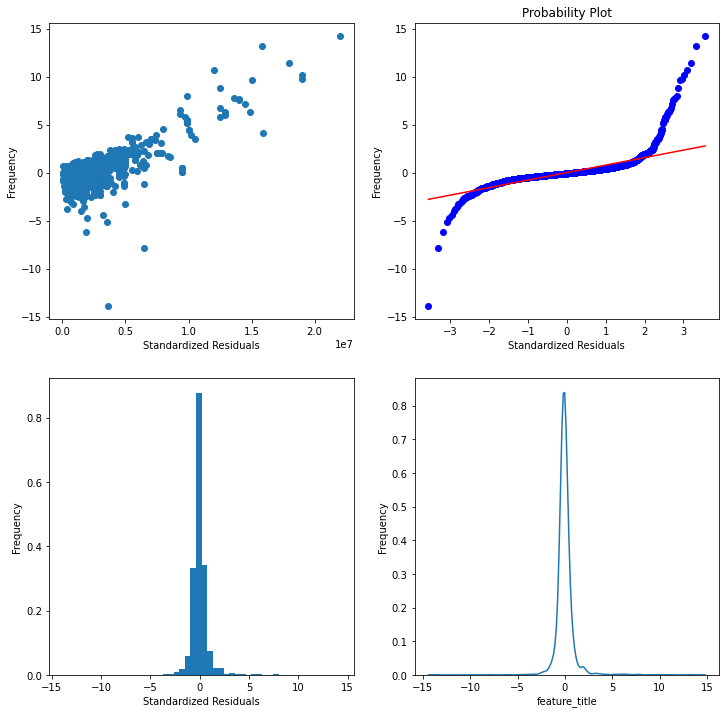

In [51]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# calculate residuals
Residuals = y_test - y_pred_ModelV02.reshape(-1,1)
Residuals = Residuals.reshape(1,-1)
Residuals = Residuals[0]

# calculate standardizes reesiduals
Residuals_stdz = (Residuals - np.mean(Residuals)) / np.std(Residuals)

# titles for plots
feature_title = 'Standardized Residuals'

# Set up the layout for two plots side by side
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Create the scatter plot
density1 = axs[0,0].scatter(y_test, Residuals_stdz)
axs[0,0].set_xlabel(feature_title)
axs[0,0].set_ylabel('Frequency')

# Create the QQ plot
density2 = stats.probplot(Residuals_stdz, plot=axs[0,1])
axs[0,1].set_xlabel(feature_title)
axs[0,1].set_ylabel('Frequency')

# Create the density plot
density1 = axs[1,0].hist(Residuals_stdz, bins=50, density=True)
axs[1,0].set_xlabel(feature_title)
axs[1,0].set_ylabel('Frequency')

# Create the density plot 
density2 = sns.kdeplot(Residuals_stdz)
axs[1,1].set_xlabel(f"feature_title")
axs[1,1].set_ylabel('Frequency')

Die Residuen passen nicht gut auf eine Normalverteilung

ich werde die folgenden Vorgehen versuchen, um die Verteilung der Residuals zu verbessern:
- Enternen / Transformieren von Outliers
- Check for multicolinearity
- Transform feature varibales

## Model v03 incl. Residual Analsys
Droppen von lan und lon für tiefere VIF scores

In [52]:
vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
print(vif)

[82.06048647489192, 73.13629599667117, 12.736379635299011, 5.8019803125446066]


In [53]:
vif = [variance_inflation_factor(X_train[:,2:], i) for i in range(X_train[:,2:].shape[1])]
print(vif)

[5.64714371309942, 5.64714371309942]


In [54]:
# create Model
ModelV03 = ElasticNet()

# define grid
param_grid = {'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3]}

# set up grid model
grid_ModelV03 = GridSearchCV(ModelV03, param_grid, cv=5, scoring='r2')

# grid search for best parameters
grid_ModelV03.fit(X_train[:,2:], y_train)

# set alpha
ModelV03.alpha = grid_ModelV03.best_params_['alpha']

# fit model
ModelV03.fit(
    y = y_train,
    X = X_train[:,2:]
)

# predict with testing data
y_pred_ModelV03 = ModelV03.predict(X_test[:,2:])

# evaluate model
MAEP = 100 * (sum(abs(y_test - y_pred_ModelV03.reshape(-1,1))) / len(y_test)) / y_test.mean()
print(f"Train r2: {grid_ModelV03.score(X_train[:,2:], y_train)}")
print(f"Test r2: {grid_ModelV03.score(X_test[:,2:], y_test)}")
print(f"MAEP testing data: {MAEP[0]}")

Train r2: 0.43071536239071395
Test r2: 0.43147386808660404
MAEP testing data: 43.045900781080476


Text(0, 0.5, 'Frequency')

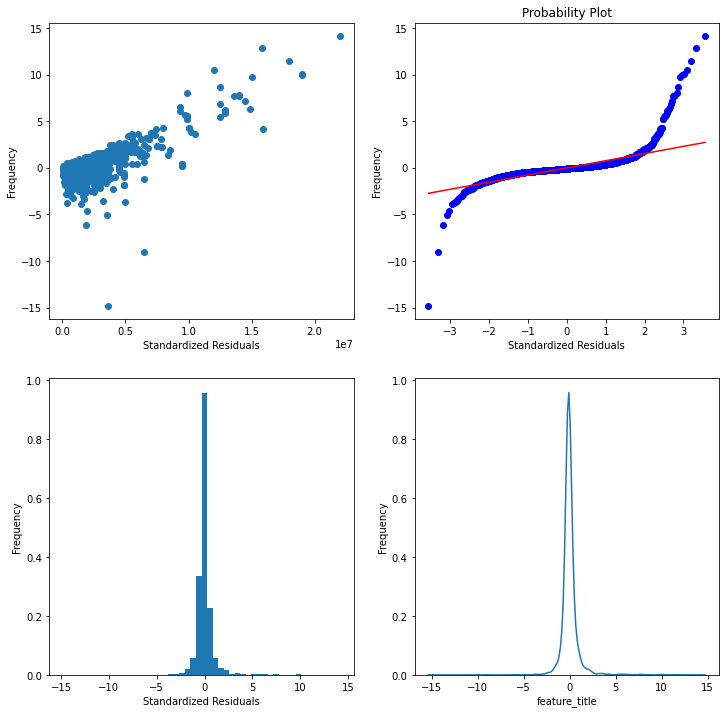

In [55]:
##################################### Check Residuals ###################################
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# calculate residuals
Residuals = y_test - y_pred_ModelV03.reshape(-1,1)
Residuals = Residuals.reshape(1,-1)
Residuals = Residuals[0]

# calculate standardizes reesiduals
Residuals_stdz = (Residuals - np.mean(Residuals)) / np.std(Residuals)

# titles for plots
feature_title = 'Standardized Residuals'

# Set up the layout for two plots side by side
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Create the scatter plot
density1 = axs[0,0].scatter(y_test, Residuals_stdz)
axs[0,0].set_xlabel(feature_title)
axs[0,0].set_ylabel('Frequency')

# Create the QQ plot
density2 = stats.probplot(Residuals_stdz, plot=axs[0,1])
axs[0,1].set_xlabel(feature_title)
axs[0,1].set_ylabel('Frequency')

# Create the density plot
density1 = axs[1,0].hist(Residuals_stdz, bins=50, density=True)
axs[1,0].set_xlabel(feature_title)
axs[1,0].set_ylabel('Frequency')

# Create the density plot 
density2 = sns.kdeplot(Residuals_stdz)
axs[1,1].set_xlabel(f"feature_title")
axs[1,1].set_ylabel('Frequency')

Das Model wurde durch entfernen der Features nicht verbessert und die Verteilung der Residuen ist auch nicht besser geworden

## Model v04 incl. Residual Analsys
Transformieren der Features

#### Transformation Feature 'Rooms'

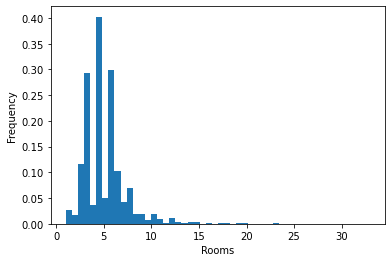

In [56]:
# distribution plot feature
plt.hist(X_train[:,2], bins=50, density=True)
plt.xlabel('Rooms')
plt.ylabel('Frequency')
plt.show()

Rooms werde ich nicht transformieren, da diese eine ordinale variable ist.

#### Transformation Feature 'Living Space'


    Transformations for better skewness of feature variable 'square meters'
    -------------
    skew square meters:           6.924774162926479
    skew sqrt(square meters):     1.917470684251758
    skew log(square meters):      0.18209317732237246
    skew log10(square meters):    0.18209317732236938
    skew inverse(square meters):  59.42661117630935
    


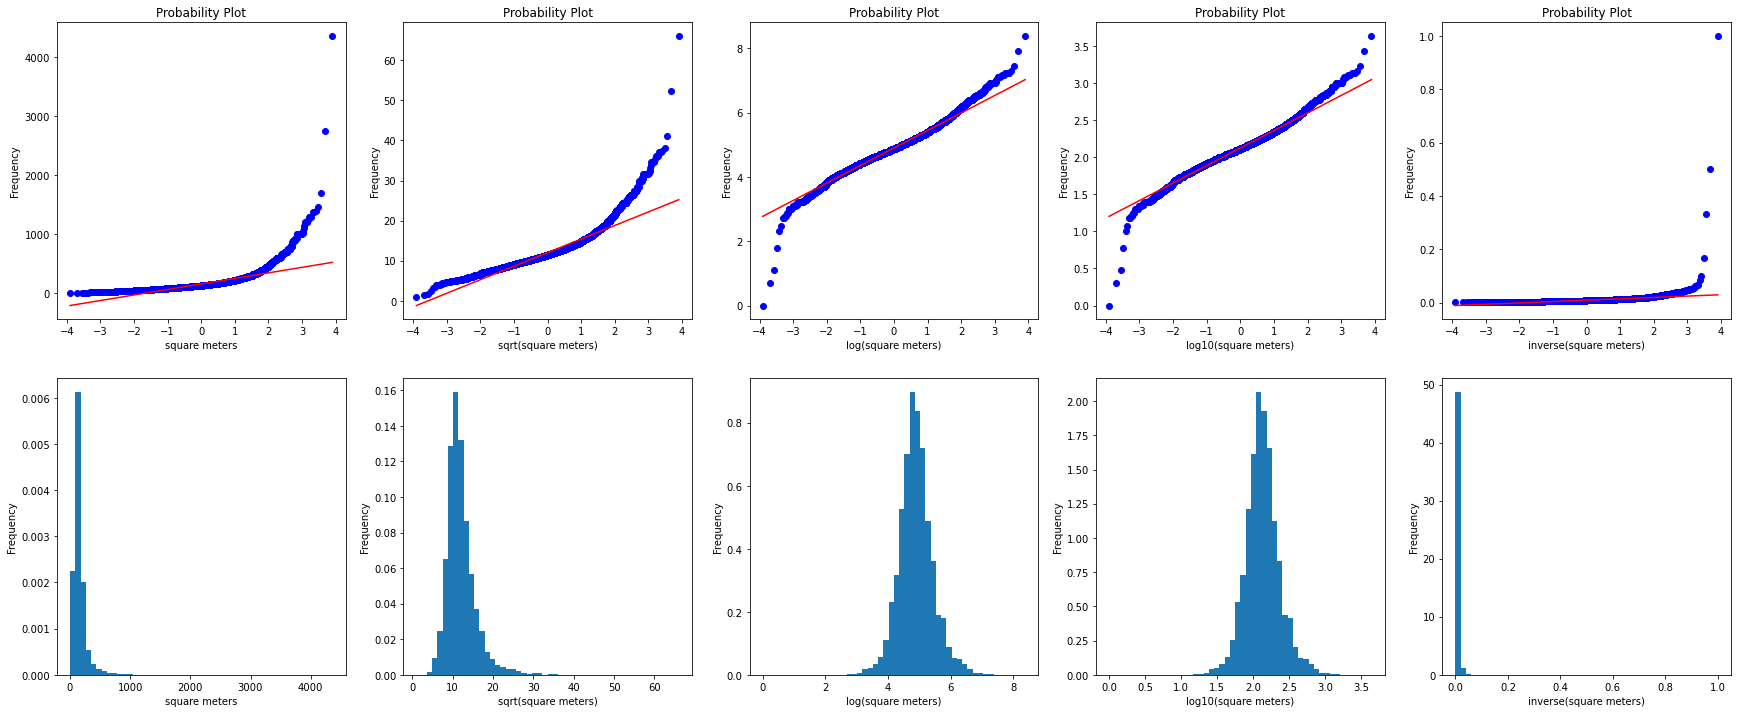

In [57]:
from scipy.stats import skew

# calculate features
feature_old = X_train[:,3]
feature_sqrt_transformed = np.sqrt(feature_old)
feature_log_transformed = np.log(feature_old)
feature_log10_transformed = np.log10(feature_old)
feature_inverse_transformed = 1/(feature_old)

# titles for plots
feature_title = 'square meters'

# Set up the layout for two plots side by side
fig, axs = plt.subplots(2, 5, figsize=(30, 12))

# Create the Q-Q plot
density1 = stats.probplot(feature_old, plot=axs[0,0])
axs[0,0].set_xlabel(feature_title)
axs[0,0].set_ylabel('Frequency')

# Create the Q-Q plot for sqrt transformed
density2 = stats.probplot(feature_sqrt_transformed, plot=axs[0,1])
axs[0,1].set_xlabel(f"sqrt({feature_title})")
axs[0,1].set_ylabel('Frequency')

# Create the Q-Q plot for log transformed
density2 = stats.probplot(feature_log_transformed, plot=axs[0,2])
axs[0,2].set_xlabel(f"log({feature_title})")
axs[0,2].set_ylabel('Frequency')

# Create the Q-Q plot for log10 transformed
density2 = stats.probplot(feature_log10_transformed, plot=axs[0,3])
axs[0,3].set_xlabel(f"log10({feature_title})")
axs[0,3].set_ylabel('Frequency')

# Create the Q-Q plot for inverse transformed
density2 = stats.probplot(feature_inverse_transformed, plot=axs[0,4])
axs[0,4].set_xlabel(f"inverse({feature_title})")
axs[0,4].set_ylabel('Frequency')

# Create the density plot
density1 = axs[1,0].hist(feature_old, bins=50, density=True)
axs[1,0].set_xlabel(feature_title)
axs[1,0].set_ylabel('Frequency')

# Create the density plot for sqrt transformed
density2 = axs[1,1].hist(feature_sqrt_transformed, bins=50, density=True)
axs[1,1].set_xlabel(f"sqrt({feature_title})")
axs[1,1].set_ylabel('Frequency')

# Create the density plot for log transformed
density2 = axs[1,2].hist(feature_log_transformed, bins=50, density=True)
axs[1,2].set_xlabel(f"log({feature_title})")
axs[1,2].set_ylabel('Frequency')

# Create the density plot for log10 transformed
density2 = axs[1,3].hist(feature_log10_transformed, bins=50, density=True)
axs[1,3].set_xlabel(f"log10({feature_title})")
axs[1,3].set_ylabel('Frequency')

# Create the density plot for inverse transformed
density2 = axs[1,4].hist(feature_inverse_transformed, bins=50, density=True)
axs[1,4].set_xlabel(f"inverse({feature_title})")
axs[1,4].set_ylabel('Frequency')

print(
    f"""
    Transformations for better skewness of feature variable '{feature_title}'
    -------------
    skew {feature_title}:           {skew(feature_old)}
    skew sqrt({feature_title}):     {skew(feature_sqrt_transformed)}
    skew log({feature_title}):      {skew(feature_log_transformed)}
    skew log10({feature_title}):    {skew(feature_log10_transformed)}
    skew inverse({feature_title}):  {skew(feature_inverse_transformed)}
    """
)

Eine Log10 Transformation für die Varibale price könnte helfen, da die Daten dann normalverteilt sind.

#### neues Model mit transformierten Variablen

In [58]:
################################## transform Variables ####################################
X_train_transformed = np.column_stack((X_train[:,2], np.log(X_train[:,3])))
X_test_transformed = np.column_stack((X_test[:,2], np.log(X_test[:,3])))

################################## create & fit model ####################################
# create Model
ModelV04 = ElasticNet()

# define grid
param_grid = {'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3]}

# set up grid model
grid_ModelV04 = GridSearchCV(ModelV04, param_grid, cv=5, scoring='r2')

# grid search for best parameters
grid_ModelV04.fit(X_train_transformed, y_train)

# set alpha
ModelV04.alpha = grid_ModelV04.best_params_['alpha']

# fit model
ModelV04.fit(
    y = y_train,
    X = X_train_transformed
)

# predict with testing data
y_pred_ModelV04 = ModelV04.predict(X_test_transformed)

################################## evaluate model ####################################

MAEP = 100 * (sum(abs(y_test - y_pred_ModelV04.reshape(-1,1))) / len(y_test)) / y_test.mean()
print(f"Train r2: {grid_ModelV04.score(X_train_transformed, y_train)}")
print(f"Test r2: {grid_ModelV04.score(X_test_transformed, y_test)}")
print(f"MAEP testing data: {MAEP[0]}")

Train r2: 0.3561660654603124
Test r2: 0.35419945164119704
MAEP testing data: 51.6611855372263


Text(0, 0.5, 'Frequency')

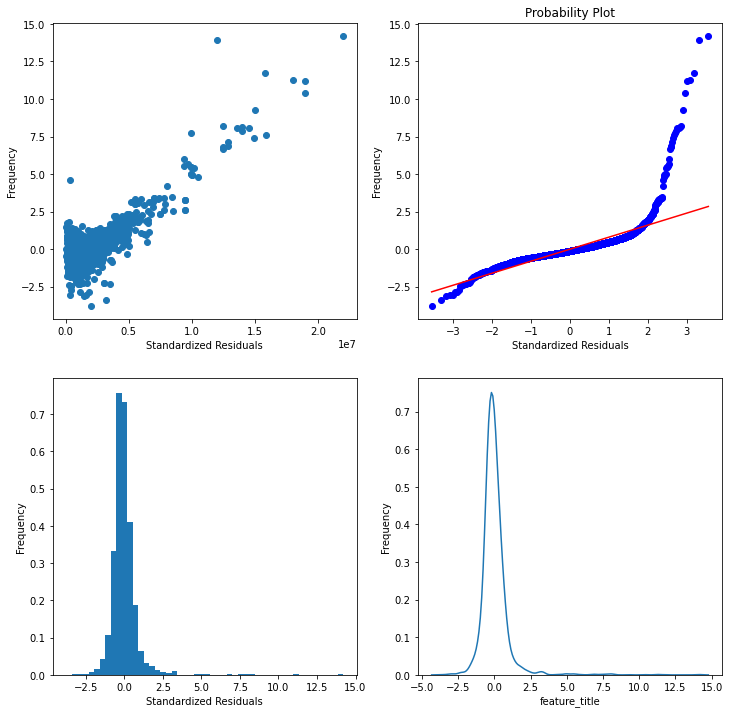

In [59]:
##################################### Check Residuals ###################################
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# calculate residuals
Residuals = y_test - y_pred_ModelV04.reshape(-1,1)
Residuals = Residuals.reshape(1,-1)
Residuals = Residuals[0]

# calculate standardizes reesiduals
Residuals_stdz = (Residuals - np.mean(Residuals)) / np.std(Residuals)

# titles for plots
feature_title = 'Standardized Residuals'

# Set up the layout for two plots side by side
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Create the scatter plot
density1 = axs[0,0].scatter(y_test, Residuals_stdz)
axs[0,0].set_xlabel(feature_title)
axs[0,0].set_ylabel('Frequency')

# Create the QQ plot
density2 = stats.probplot(Residuals_stdz, plot=axs[0,1])
axs[0,1].set_xlabel(feature_title)
axs[0,1].set_ylabel('Frequency')

# Create the density plot
density1 = axs[1,0].hist(Residuals_stdz, bins=50, density=True)
axs[1,0].set_xlabel(feature_title)
axs[1,0].set_ylabel('Frequency')

# Create the density plot 
density2 = sns.kdeplot(Residuals_stdz)
axs[1,1].set_xlabel(f"feature_title")
axs[1,1].set_ylabel('Frequency')

Die Transformation hat keine Verbesserungen gebracht, sondern den r2, sowie die Verteilung der Residuen verschlechtert

## Model v05 incl. Residual Analsys
Excluding Outliers from the training data

#### Checking for Outliers

Outliers: 959 (6.54%)


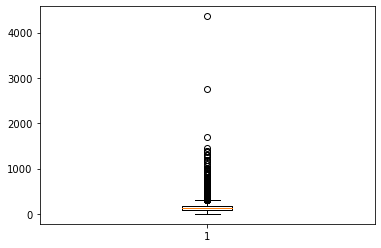

In [60]:
# Create a box plot of the data
bp = plt.boxplot(X_train[:,3])

# Get the outliers from the box plot
outliers = [item.get_ydata() for item in bp['fliers']]

# Flatten the list of outliers
outliers = [item for sublist in outliers for item in sublist]

# Calculate the percentage of outliers
num_outliers = len(outliers)
num_total = X_train[:,3].size
percentage = num_outliers / num_total * 100
print(f"Outliers: {num_outliers} ({percentage:.2f}%)")

Outliers: 1175 (8.02%)


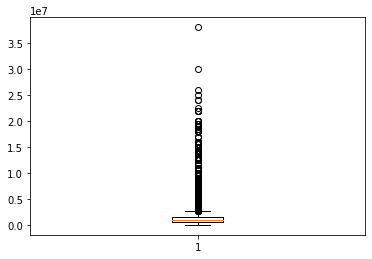

In [61]:
# Create a box plot of the data
bp = plt.boxplot(y_train)

# Get the outliers from the box plot
outliers = [item.get_ydata() for item in bp['fliers']]

# Flatten the list of outliers
outliers = [item for sublist in outliers for item in sublist]

# Calculate the percentage of outliers
num_outliers = len(outliers)
num_total = y_train.size
percentage = num_outliers / num_total * 100
print(f"Outliers: {num_outliers} ({percentage:.2f}%)")

Bei den Varibale Price und Living Space gibt es viele outlier, ich werde die top 2% der daten jeweils entfernen

#### Trimm data

In [62]:
# combine y and X values
data = np.column_stack((y_train, X_train))

# sort for pirce
sorted_data = data[np.argsort(-data[:, 0])]

# trimm top 2%
data = sorted_data[:int(data.shape[0] * 0.98),:]

# sort for living_space
sorted_data = data[np.argsort(-data[:, 4])]

# trimm top 2%
data = sorted_data[:int(data.shape[0] * 0.98),:]

# split into y and X
y_train_trimmed = data[:,0]
X_train_trimmed = data[:,1:]
X_train_trimmed = X_train_trimmed[:,2:]


#### new model with trimmed data

In [63]:
################################## create & fit model ####################################
# create Model
ModelV05 = ElasticNet()

# define grid
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 30, 100, 300, 1000],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
}

# set up grid model
grid_ModelV05 = GridSearchCV(ModelV05, param_grid, cv=5, scoring='r2')

# grid search for best parameters
grid_ModelV05.fit(X_train_trimmed, y_train_trimmed)

# set alpha
print(f"best alpha: {grid_ModelV05.best_params_['alpha']}")
ModelV05.alpha = grid_ModelV05.best_params_['alpha']

print(f"best l1_ratio: {grid_ModelV05.best_params_['l1_ratio']}")
ModelV05.l1_ratio = grid_ModelV05.best_params_['l1_ratio']

# fit model
ModelV05.fit(
    y = y_train_trimmed,
    X = X_train_trimmed
)

# predict with testing data
y_pred_ModelV05 = ModelV05.predict(X_test[:,2:])

################################## evaluate model ####################################

MAEP = 100 * (sum(abs(y_test - y_pred_ModelV05.reshape(-1,1))) / len(y_test)) / y_test.mean()
print(f"Train r2: {ModelV05.score(X_train_trimmed, y_train_trimmed)}")
print(f"Test r2: {ModelV05.score(X_test[:,2:], y_test)}")
print(f"MAEP testing data: {MAEP[0]}")

best alpha: 100
best l1_ratio: 0.3
Train r2: 0.41937915775662504
Test r2: 0.4172047263619447
MAEP testing data: 42.78318722011803


#### Residuals of new model

Text(0, 0.5, 'Frequency')

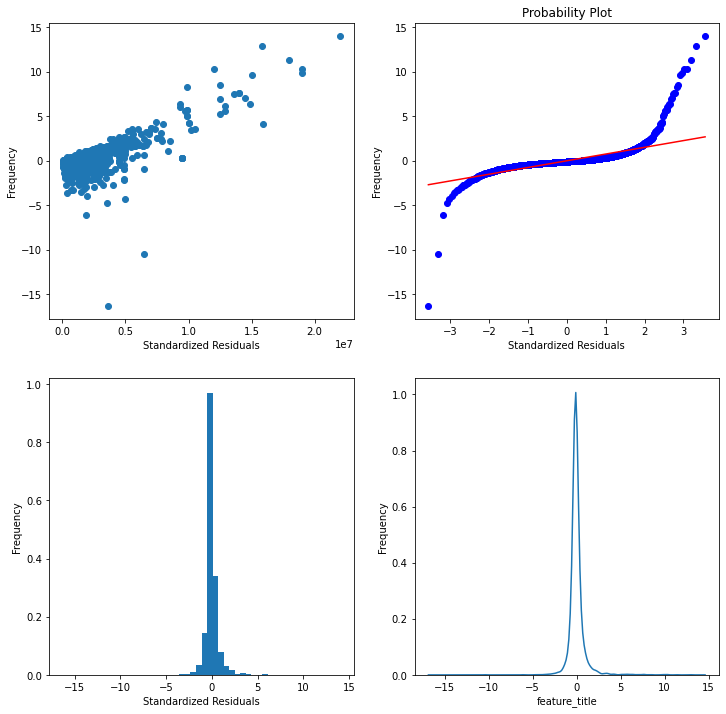

In [64]:
##################################### Check Residuals ###################################
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# calculate residuals
Residuals = y_test - y_pred_ModelV05.reshape(-1,1)
Residuals = Residuals.reshape(1,-1)
Residuals = Residuals[0]

# calculate standardizes reesiduals
Residuals_stdz = (Residuals - np.mean(Residuals)) / np.std(Residuals)

# titles for plots
feature_title = 'Standardized Residuals'

# Set up the layout for two plots side by side
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Create the scatter plot
density1 = axs[0,0].scatter(y_test, Residuals_stdz)
axs[0,0].set_xlabel(feature_title)
axs[0,0].set_ylabel('Frequency')

# Create the QQ plot
density2 = stats.probplot(Residuals_stdz, plot=axs[0,1])
axs[0,1].set_xlabel(feature_title)
axs[0,1].set_ylabel('Frequency')

# Create the density plot
density1 = axs[1,0].hist(Residuals_stdz, bins=50, density=True)
axs[1,0].set_xlabel(feature_title)
axs[1,0].set_ylabel('Frequency')

# Create the density plot 
density2 = sns.kdeplot(Residuals_stdz)
axs[1,1].set_xlabel(f"feature_title")
axs[1,1].set_ylabel('Frequency')

Das Model wird nicht verbessert durch ein trimmen der Daten

## Model v06 incl. Residual Analsys
Untersuchen, ob durch generieren von neuen Features neue zusammenhnge gefunden werden können.

#### Check fo linearity

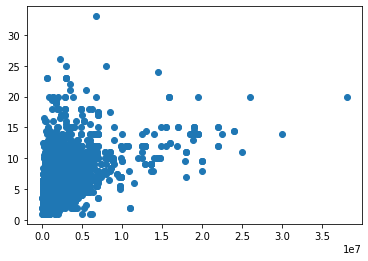

In [65]:
import matplotlib.pyplot as plt

plt.scatter(y_train, X_train[:,2])

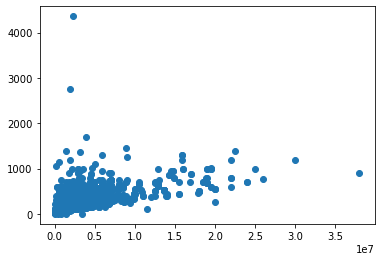

In [66]:
plt.scatter(y_train, X_train[:,3])

Grundsätzlich nimmt ein lineares Regressonsmodell an, dass ein Linearer Zusammenhang zwischen den Fatures und der target varibale besteht. Ich kann mit scatterplots von target gegen feature variable überprüfen, ob ein mehr oder weniger linearer zusammenhang besteht. Die beiden scatterplots sehen jedoch eher trichterförmig aus, dies ist normalerweise ein hinweis dafür, dass ein Lineares Regressionsmodel nicht das optimale model ist.

Ich werde versuchen polynomiale features zu generieren um evtl. einen zusammenhang zu finden, welcher durch die ursprünglichen Variablen nicht erkannt wird.

#### Generate Polynomial features

In [67]:
################################# generate polynomial features ####################
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures-Transformer erstellen
poly_transformer = PolynomialFeatures(degree=2)

# generate polynomila features --> generates polynomial of 2nd degree, creates all possible feature combinationas and adds a 1 column
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.fit_transform(X_test)

#### Feature Scaling

In [68]:
################################# Fature Scaling ####################
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train_poly)

# Transform the training and testing data
X_train_poly_scaled = scaler.transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

#### Checking for multicolinearity

In [69]:
X_train_poly_scaled_vif = X_train_poly_scaled
X_test_poly_scaled_vif = X_test_poly_scaled
vif = [variance_inflation_factor(X_train_poly_scaled_vif, i) for i in range(X_train_poly_scaled_vif.shape[1])]
print(vif)

[nan, 70516.6136176227, 11633.209451124518, 27503.392807791315, 36782.08544882513, 71298.30576062298, 13087.550176394412, 27504.940509300093, 36207.079531682524, 360.46721727103267, 172.90679759907232, 198.43948649506106, 22.177440565662394, 21.680091919907007, 4.238910992438764]


c:\Users\rami0\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Gemäss online discussion scheint die multicolinearity von polynomial features kein problem zu sein.

#### feature selection

In [70]:
################################# Feature Selection ####################
from sklearn.feature_selection import RFE

# create Model
ModelV06_1 = ElasticNet(
    max_iter=10000,
    selection= 'random'
)

# Use RFE to select the most important features
rfe = RFE(ModelV06_1, n_features_to_select=10)

# define grid
param_grid = {
    'n_features_to_select': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

# Create a GridSearchCV instance for hyperparameter optimization
grid_search = GridSearchCV(rfe, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_poly_scaled_vif, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Transform the training and testing data using the selected features and the best parameters
rfe.set_params(**best_params)

# fit rfe
rfe.fit(X_train_poly_scaled_vif, y_train)

# Transform the training and testing data using the selected features
X_train_poly_scaled_selected = rfe.transform(X_train_poly_scaled_vif)
X_test_poly_scaled_selected = rfe.transform(X_test_poly_scaled_vif)

# set best parameters
print(f"best n_features_to_select: {best_params['n_features_to_select']}")

best n_features_to_select: 11


#### fit model incl. hyperparameter optimazation

In [71]:
################################# Feature Selection ####################
from sklearn.feature_selection import RFE

# create Model
ModelV06_2 = ElasticNet(
    max_iter=10000,
    selection= 'random'
)

# define grid
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Create a GridSearchCV instance for hyperparameter optimization
grid_search = GridSearchCV(ModelV06_2, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_poly_scaled_selected, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Transform the training and testing data using the selected features and the best parameters
ModelV06_2.set_params(**best_params)

# set best parameters
print(f"set alpha ot best param: {best_params['alpha']}")
ModelV06_2.alpha = best_params['alpha']

print(f"set l1_ratio ot best param: {best_params['l1_ratio']}")
ModelV06_2.l1_ratio = best_params['l1_ratio']

# Train the model using the selected features
ModelV06_2.fit(X_train_poly_scaled_selected, y_train)

# Evaluate the model performance on the test data
score = ModelV06_2.score(X_test_poly_scaled_selected, y_test)

# predict with testing data
y_pred_ModelV06_2 = ModelV06_2.predict(X_test_poly_scaled_selected)

################################## evaluate model ####################################

MAEP = 100 * (sum(abs(y_test - y_pred_ModelV06_2.reshape(-1,1))) / len(y_test)) / y_test.mean()
print(f"Train r2: {ModelV06_2.score(X_train_poly_scaled_selected, y_train)}")
print(f"Test r2: {ModelV06_2.score(X_test_poly_scaled_selected, y_test)}")
print(f"MAEP testing data: {MAEP[0]}")

c:\Users\rami0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.924e+15, tolerance: 3.270e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\rami0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.590e+15, tolerance: 3.143e+12
  model = cd_fast.enet_coordinate_descent(
c:\Users\rami0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.983e+15, toleranc

set alpha ot best param: 0.001
set l1_ratio ot best param: 0.9
Train r2: 0.5433206618552994
Test r2: 0.535352068673213
MAEP testing data: 40.23824991063251


c:\Users\rami0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.402e+15, tolerance: 4.066e+12
  model = cd_fast.enet_coordinate_descent(


Der r2 konnte nochmals verbessert werden auf 0.50. Ich werde noch plotten wie sich das lineare regressionsmodell verhält, wenn ich es mit 10% der Daten trainiere und anschliessend in 10% schritte das modell bis 100% der Daten trainiere. Ich erhoffe mir davon zu sehen, ob ich das Modell noch komplexer gestalten soll, oder ob ich die Regularisieren erhöhen soll.

#### Residuals of new model

Text(0, 0.5, 'Frequency')

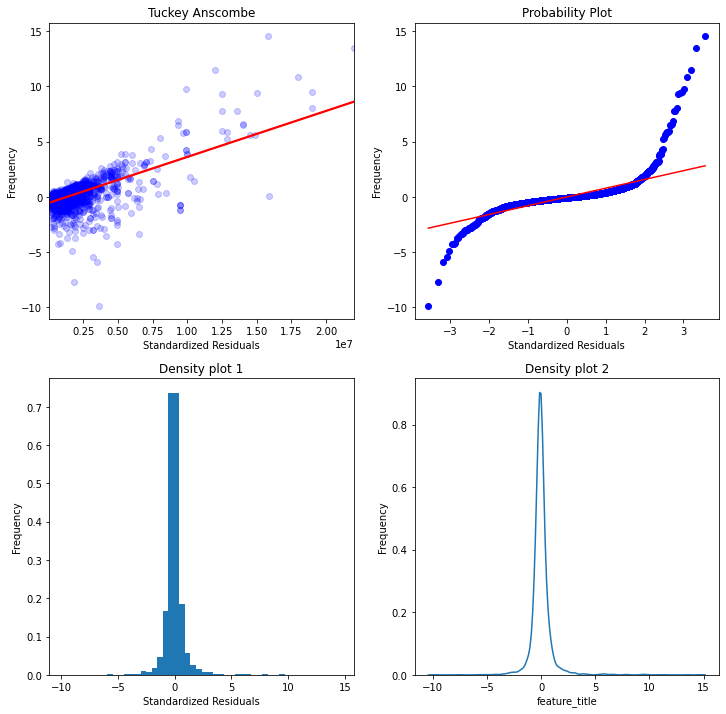

In [72]:
##################################### Check Residuals ###################################
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# calculate residuals
Residuals = y_test - y_pred_ModelV06_2.reshape(-1,1)
Residuals = Residuals.reshape(1,-1)
Residuals = Residuals[0]

# calculate standardizes reesiduals
Residuals_stdz = (Residuals - np.mean(Residuals)) / np.std(Residuals)

# titles for plots
feature_title = 'Standardized Residuals'

# Set up the layout for two plots side by side
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Create the scatter plot
TuckeyAnscombe = sns.regplot(x=y_test, y=Residuals_stdz, ci=None, scatter_kws={'alpha': 0.2, 'color' : 'blue'}, ax=axs[0,0], color='red')
axs[0,0].set_title('Tuckey Anscombe')
axs[0,0].set_xlabel(feature_title)
axs[0,0].set_ylabel('Frequency')

# Create the QQ plot
QQ_plot = stats.probplot(Residuals_stdz, plot=axs[0,1])
axs[0,1].set_xlabel(feature_title)
axs[0,1].set_ylabel('Frequency')

# Create the density plot
density1 = axs[1,0].hist(Residuals_stdz, bins=50, density=True)
axs[1,0].set_title('Density plot 1')
axs[1,0].set_xlabel(feature_title)
axs[1,0].set_ylabel('Frequency')

# Create the density plot 
density2 = sns.kdeplot(Residuals_stdz, ax=axs[1,1])
axs[1,1].set_title('Density plot 2')
axs[1,1].set_xlabel(f"feature_title")
axs[1,1].set_ylabel('Frequency')

Die Residuals konnten nicht wirklich verbessert werden. Jedoch ist der r2 besser geworden.

## Model v07 Analasys of Model performance

In [73]:
# create Model
ModelV07 = ElasticNet(
    max_iter=10000,
    selection= 'random',
    alpha = 0.001,
    l1_ratio = 0.9
)


costs_training = []
costs_testing = []
portions = []

for i1 in range(10):
    portions.append((i1+1) * 0.1)
    tmp_costs_training = []
    tmp_costs_testing = []

    for i2 in range(10):
        np.random.seed(i2)

        # sample part of data
        sample_size_train = int(X_train_poly_scaled_selected.shape[0] * portions[i1])
        sample_size_test = int(X_test_poly_scaled_selected.shape[0] * portions[i1])
        indices_train = np.random.choice(len(X_train_poly_scaled_selected), sample_size_train, replace=False)
        indices_test = np.random.choice(len(X_test_poly_scaled_selected), sample_size_test, replace=False)
        X_train_sample = X_train_poly_scaled_selected[indices_train]
        y_train_sample = y_train[indices_train]
        X_test_sample = X_test_poly_scaled_selected[indices_test]
        y_test_sample = y_test[indices_test]
        
        
        # Train the model using the selected features
        ModelV07.fit(X_train_sample, y_train_sample)

        # calculate r2 scores
        tmp_costs_training.append(ModelV07.score(X_train_sample, y_train_sample))
        tmp_costs_testing.append(ModelV07.score(X_test_sample, y_test_sample))


    # append the calculated costs
    costs_training.append(np.mean(tmp_costs_training))
    costs_testing.append(np.mean(tmp_costs_testing))


c:\Users\rami0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.959e+14, tolerance: 3.745e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\rami0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+15, tolerance: 5.394e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\rami0\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.073e+14, toleranc

Final cost for training: 0.5433252697327229
Final cost for testing: 0.5352844309556597


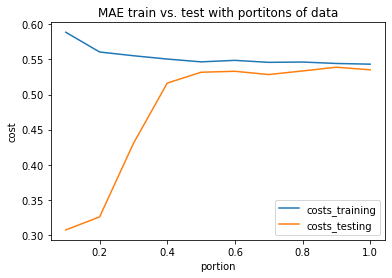

In [74]:
# print final cost
print(f"Final cost for training: {costs_training[-1]}")
print(f"Final cost for testing: {costs_testing[-1]}")

# plot line of training costs
plt.plot(
    portions,
    costs_training,
    label = 'costs_training'
)

# plot line of testing costs
plt.plot(
    portions,
    costs_testing,
    label = 'costs_testing'
)

plt.title('MAE train vs. test with portitons of data')
plt.ylabel('cost')
plt.xlabel('portion')
plt.legend()

Der Plot zeigt, dass das modell so gut wie möglich ist. Es würde nun keinen Sinn mehr machen mehr trainingsdaten zu verwenden. Der r2 ist aber immernoch relativ klein ca. 0.53... Dies deutet darauf hin, dass unser model nicht representativ ist für unsere Daten. Es würde nun Sinn machen andere Modelle zu verwenden. Eine weitere Möglichkeit wäre es das Model komplexer zu gestalten.

--> Wir haben genug daten, wir könnten sogar noch daten droppen und wären immernoch i.o., jedoch haben wir zu wenige features

Ich werde nun in einem nächsten Schritt alle Features miteinbeziehen in die Analyse. Zudem werde ich die nan values bei den numerischen values durch den Median ersetzen. Der Median bietet sich an, weil es eine Einfache methode ist imputationen vorzunehmen. Zudem haben wir sehr viele Outlier im Modell, lineare Modelle haben grundsätzlich probleme mit ouliern, weil in der Kostenfunktion alle Datenpunkte miteinbezogen werden (ähnlich wie z.B: der mittelwert anfälliger auf outlier ist als der median). Wenn wir nun mehr "Mittelwerte" wird der Einfluss der Outlier abgeschwächt.

# Neues Modell mit weiteren Features
Using all the features for the model. 

#### Import libraries

In [75]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

#### Import data

In [76]:
## import data
immo_data = pd.read_csv(
    './data/immo_data_202208_v2.csv',
    index_col=[0]
    )

## replace whitespaces in column names
immo_data.columns = immo_data.columns.str.replace(" ", "_")

c:\Users\rami0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [77]:
for i in immo_data.columns:
    print(i)

Unnamed:_0.1
Municipality
Living_space
Plot_area
Floor_space
Availability
location
description
detailed_description
url
table
Floor
detail_responsive#municipality
detail_responsive#surface_living
detail_responsive#floor
detail_responsive#available_from
Gemeinde
Wohnfläche
Stockwerk
Nutzfläche
Verfügbarkeit
Grundstücksfläche
detail_responsive#surface_property
detail_responsive#surface_usable
Commune
Surface_habitable
Surface_du_terrain
Surface_utile
Disponibilité
Étage
Comune
Superficie_abitabile
Disponibilità
Gross_return
Piano
Superficie_del_terreno
Superficie_utile
Municipality_merged
Floor_merged
Living_space_merged
Floor_space_merged
Plot_area_merged
Availability_merged
location_parsed
title
details
address
price
link
details_structured
lat
lon
index
ForestDensityL
ForestDensityM
ForestDensityS
Latitude
Locality
Longitude
NoisePollutionRailwayL
NoisePollutionRailwayM
NoisePollutionRailwayS
NoisePollutionRoadL
NoisePollutionRoadM
NoisePollutionRoadS
PopulationDensityL
PopulationDens

#### Improve Rooms column

#### Improve Living Space 

#### Improve Price

#### Improve rooms and living_area columns

In [78]:

# Split the data into features and target
X = immo_data.drop("price", axis=1)
y = immo_data.price

# Split numerical / categorical features
numeric_features =
categorical_features = 

SyntaxError: invalid syntax (<ipython-input-78-a7efd1719806>, line 6)

In [ ]:




# Create a pipeline for feature engineering and transformation
numeric_features = ["feature1", "feature2", "feature3"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ])

categorical_features = ["feature4", "feature5"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

poly_transformer = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=2))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("poly", poly_transformer, numeric_features)])

# Create the elastic net model and fit it to the data
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("feature_selection", SelectKBest(mutual_info_regression)),
                        ("elasticnet", ElasticNet())])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Use grid search to find the best hyperparameters for the model
param_grid = {"elasticnet__alpha": [0.001, 0.01, 0.1, 1, 10],
              "elasticnet__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9],
              "feature_selection__k": [5, 10, 15, 20]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best hyperparameters to fit the model to the training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)


In [ ]:
# cls_data = immoscout_reduced.drop(columns=[
#     'description',
#     'detailed_description',
#     'street',
#     'house_number',
#     'city',
#     'canton',
#     'zip',
#     'provider'
# ])

# cls_data = cls_data.dropna()

# old stuff

In [ ]:
## parse floors
immoscout.Floor = immoscout.Floor.replace({
    '4. Basement': -4,
    '3. Basement': -3,
    '2. Basement': -2,
    '1. Basement': -1,
    'Ground floor': 0,
    '1. floor': 1,
    '2. floor': 2,
    '3. floor': 3,
    '4. floor': 4,
    '5. floor': 5,
    '6. floor': 6,
    '7. floor': 7,
    '8. floor': 8,
    '9. floor': 9,
    '10. floor': 10,
    '11. floor': 11,
    '12. floor': 12,
    '13. floor': 13,
    '14. floor': 14,
    '15. floor': 15,
    '16. floor': 16,
    '17. floor': 17,
    '18. floor': 18,
    '19. floor': 19,
    '20. floor': 20,
    '21. floor': 21,
    '22. floor': 22,
    '23. floor': 23,
    '100. floor': np.nan,
    '999. floor': np.nan,
    'nan': np.nan
})

## parse floors
immoscout.Floor_merged = immoscout.Floor_merged.replace({
    '4. Basement': -4,
    '3. Basement': -3,
    '2. Basement': -2,
    '1. Basement': -1,
    'Ground floor': 0,
    '1. floor': 1,
    '2. floor': 2,
    '3. floor': 3,
    '4. floor': 4,
    '5. floor': 5,
    '6. floor': 6,
    '7. floor': 7,
    '8. floor': 8,
    '9. floor': 9,
    '10. floor': 10,
    '11. floor': 11,
    '12. floor': 12,
    '13. floor': 13,
    '14. floor': 14,
    '15. floor': 15,
    '16. floor': 16,
    '17. floor': 17,
    '18. floor': 18,
    '19. floor': 19,
    '20. floor': 20,
    '21. floor': 21,
    '22. floor': 22,
    '23. floor': 23,
    '100. floor': np.nan,
    '999. floor': np.nan,
    'nan': np.nan
})

In [ ]:
## get addresses from geopy

locator = Nominatim(user_agent='myGeocoder')

geopy_canton = []
geopy_zip = []
geopy_city = []
geopy_street = []
geopy_house_nr = []

for index, row in immoscout_clean.head(10).iterrows():
    try:
        print(row.lat, row.lon)
        location = locator.reverse(f"{row.lat}, {row.lon}").raw
        ## get state
        try:
            geopy_canton.append(location.raw['address']['state'])
        except:
            geopy_canton.append(np.nan)
        ## get zip
        try:
            geopy_zip.append(location.raw['address']['postcode'])
        except:
            geopy_zip.append(np.nan)
        ## get city
        try:
            geopy_city.append(location.raw['address']['city'])
        except:
            geopy_city.append(location.raw['address']['town'])
        ## get street
        try:
            geopy_street.append(location.raw['address']['road'])
        except:
            geopy_street.append(np.nan)
        ## get house nr
        try:
            geopy_house_nr.append(location.raw['address']['house_number'])
        except:
            geopy_house_nr.append(np.nan)

    except:
        geopy_canton.append(np.nan)
        geopy_zip.append(np.nan)
        geopy_city.append(np.nan)
        geopy_street.append(np.nan)
        geopy_house_nr.append(np.nan)

47.4171 8.0856
47.4195 8.0827
47.4033 8.033
47.415643 8.0854228
47.4038235 8.0482879
47.4009351 8.0124603
47.4140667 8.0821155
47.3927146 8.0444448
47.4011231 8.0706905
47.3968661 8.0133738


In [ ]:
immoscout_clean['geopy_canton'] = geopy_canton
immoscout_clean['geopy_zip'] = geopy_zip
immoscout_clean['geopy_city'] = geopy_city
immoscout_clean['geopy_street'] = geopy_street
immoscout_clean['geopy_house_nr'] = geopy_house_nr